# Order Delivery Time Prediction

Linear Regression Assignment: Parcel Delivery Time Estimation
LR Delivery Time
Assignment ID: LR/02	

Name: Raghunandan Khamitkar
Batch: ML C75 EDMLAI March 2025


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [212]:
# Import essential libraries for data manipulation and analysis
# ---------------------------------------------------
# Step 1: Import essential libraries
# ---------------------------------------------------
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For statistical modeling
import statsmodels.api as sm

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")


Libraries imported successfully!


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [213]:
# Importing the file porter_data_1.csv
# ---------------------------------------------------
# Step 2: Load dataset
# ---------------------------------------------------
# Load the CSV file
df = pd.read_csv("porter_data_1.csv")
# Display first 5 rows
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [214]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
# ---------------------------------------------------
# Step 3: Data Preprocessing - Fixing Datatypes
# ---------------------------------------------------
# Convert timestamp columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Verify conversion
print("Datatypes after datetime conversion:")
print(df[['created_at', 'actual_delivery_time']].dtypes)

# Display few rows for confirmation
df[['created_at', 'actual_delivery_time']].head()


Datatypes after datetime conversion:
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


created_at actual_delivery_time
0 2015-02-06 22:24:17  2015-02-06 23:11:17
1 2015-02-10 21:49:25  2015-02-10 22:33:25
2 2015-02-16 00:11:35  2015-02-16 01:06:35
3 2015-02-12 03:36:46  2015-02-12 04:35:46
4 2015-01-27 02:12:36  2015-01-27 02:58:36

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [215]:
# Convert categorical features to category type
# ---------------------------------------------------
# Step 4: Convert categorical features to 'category'
# ---------------------------------------------------
# Automatically detect object-type columns (potential categoricals)
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical columns detected:", list(categorical_cols))

# Convert them to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify conversion
print("\nDatatypes after categorical conversions:")
print(df[categorical_cols].dtypes)

# Preview unique values for each categorical column
for col in categorical_cols:
    print(f"\n {col} unique values:")
    print(df[col].unique())


Categorical columns detected: []

Datatypes after categorical conversions:
Series([], dtype: object)


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [216]:
# Calculate time taken in minutes
# ---------------------------------------------------
# Step 5: Feature Engineering - Delivery Duration
# ---------------------------------------------------

# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Extract hour and day of week from order creation time
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.day_name()   # gives weekday name (e.g., Monday)
df['order_day_num'] = df['created_at'].dt.dayofweek  # numeric: Monday=0, Sunday=6

# Verify calculations
print("Sample delivery times (minutes):")
print(df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head())

print("\nOrder time features:")
print(df[['order_hour', 'order_day', 'order_day_num']].head())


Sample delivery times (minutes):
           created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                   59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                   46.0

Order time features:
   order_hour order_day  order_day_num
0          22    Friday              4
1          21   Tuesday              1
2           0    Monday              0
3           3  Thursday              3
4           2   Tuesday              1


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [217]:
# ---------------------------------------------------
# Step 6: Extract order time features
# ---------------------------------------------------

# Extract hour of the day when order was created
df['order_hour'] = df['created_at'].dt.hour
# Extract day of week (both numeric and text form)
df['order_day'] = df['created_at'].dt.day_name()   # e.g., Monday
df['order_day_num'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Print extracted features
print("Extracted Features:")
print("Order Hours:\n", df['order_hour'].head(10).tolist())
print("Order Days:\n", df['order_day'].head(10).tolist())
print("Order Day Numbers:\n", df['order_day_num'].head(10).tolist())

# Drop columns that are not needed for modeling
df = df.drop(columns=['created_at', 'actual_delivery_time'])
print("\nDropped 'created_at' and 'actual_delivery_time' columns.")

# Verify the result
print("\nDataset after feature extraction and dropping unnecessary columns:")
print(df.head())

# ---------------------------------------------------
# Step 7: Create 'isWeekend' categorical feature
# ---------------------------------------------------

df['isWeekend'] = df['order_day_num'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

# Print weekend details
print("\nWeekend Feature Created:")
print(df[['order_day', 'order_day_num', 'isWeekend']].head(10))



Extracted Features:
Order Hours:
 [22, 21, 0, 3, 2, 0, 2, 4, 2, 23]
Order Days:
 ['Friday', 'Tuesday', 'Monday', 'Thursday', 'Tuesday', 'Friday', 'Sunday', 'Saturday', 'Saturday', 'Saturday']
Order Day Numbers:
 [4, 1, 0, 3, 1, 4, 6, 5, 5, 5]

Dropped 'created_at' and 'actual_delivery_time' columns.

Dataset after feature extraction and dropping unnecessary columns:
   market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0

In [218]:
# Drop unnecessary columns
# ---------------------------------------------------
# Step 8: Drop unnecessary columns
# ---------------------------------------------------

# Columns to drop
cols_to_drop = ['created_at', 'actual_delivery_time']
# Drop columns safely (ignore if already missing)
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
# Verify remaining columns
print("Remaining columns after dropping:")
print(df.columns)


Remaining columns after dropping:
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes',
       'order_hour', 'order_day', 'order_day_num', 'isWeekend'],
      dtype='object')


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [219]:
# Define target variable (y) and features (X)

# ---------------------------------------------------
# Step 9: Define target variable (y) and input features (X)
# ---------------------------------------------------

# Define target
y = df['delivery_time_minutes']
# Define features (all other columns except target)
X = df.drop(columns=['delivery_time_minutes'])
# Verify shapes
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
# Preview first few rows
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())



Shape of X (features): (175777, 16)
Shape of y (target): (175777,)

Features (X):
   market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425      

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [220]:
# Split data into training and testing sets

# ---------------------------------------------------
# Step 10: Split data into training and testing sets
# ---------------------------------------------------
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify shapes
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


Training set shape (X_train): (140621, 16)
Testing set shape (X_test): (35156, 16)
Training target shape (y_train): (140621,)
Testing target shape (y_test): (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


Columns in the dataset:
['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'order_hour', 'order_day', 'order_day_num', 'isWeekend']

Numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['order_day', 'isWeekend']

Summary statistics for numerical columns:
           market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min    

Insight: market_id distribution → Mean=2.74, Std=1.33, Skew=0.23


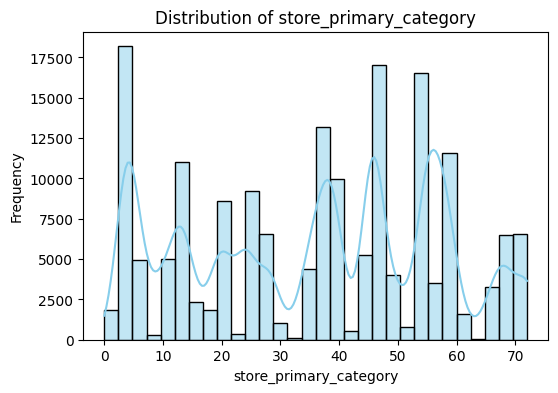

Insight: store_primary_category distribution → Mean=35.89, Std=20.73, Skew=-0.10


Insight: order_protocol distribution → Mean=2.91, Std=1.51, Skew=0.11


Insight: total_items distribution → Mean=3.20, Std=2.67, Skew=23.29


Insight: subtotal distribution → Mean=2697.11, Std=1828.55, Skew=1.92


Insight: num_distinct_items distribution → Mean=2.68, Std=1.63, Skew=1.57


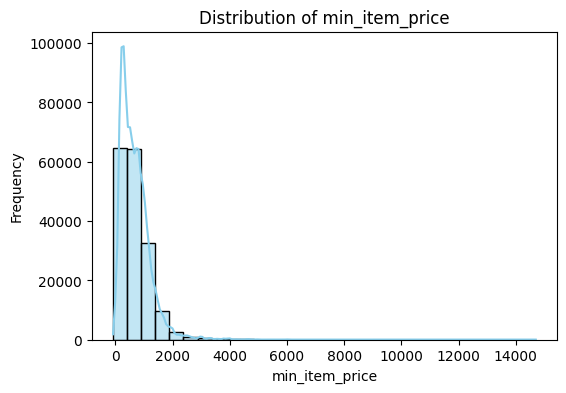

Insight: min_item_price distribution → Mean=684.97, Std=519.88, Skew=2.34


Insight: max_item_price distribution → Mean=1160.16, Std=560.83, Skew=2.20


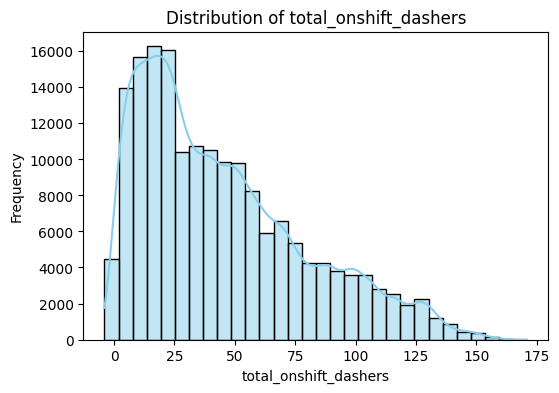

Insight: total_onshift_dashers distribution → Mean=44.92, Std=34.54, Skew=0.86


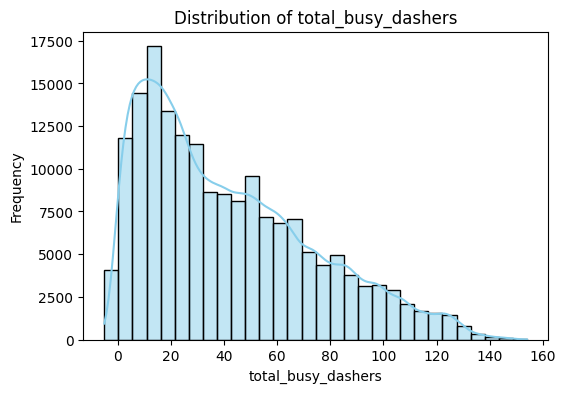

Insight: total_busy_dashers distribution → Mean=41.86, Std=32.17, Skew=0.78


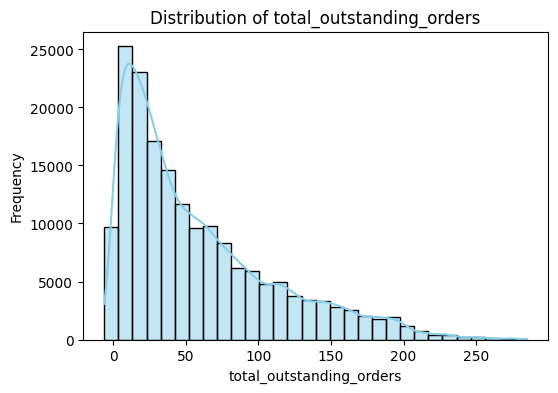

Insight: total_outstanding_orders distribution → Mean=58.23, Std=52.73, Skew=1.19


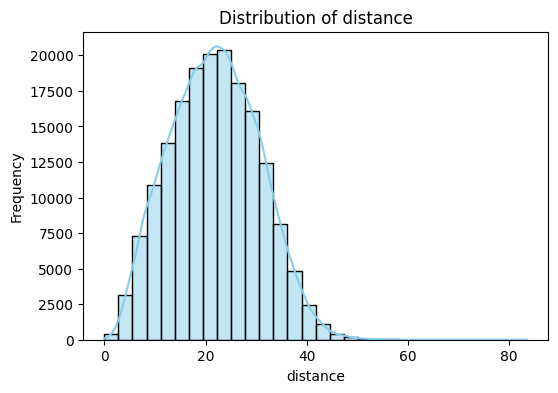

Insight: distance distribution → Mean=21.84, Std=8.75, Skew=0.14


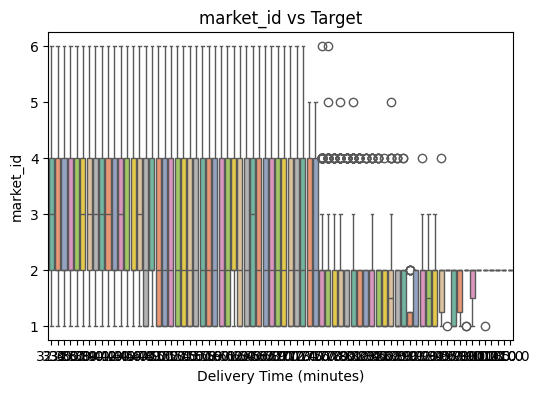

Relationship: market_id shows correlation -0.073 with Delivery Time.


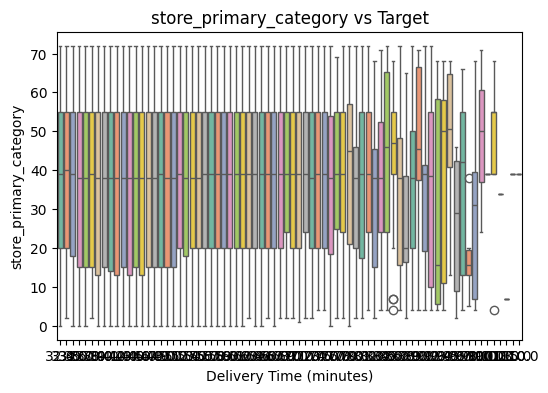

Relationship: store_primary_category shows correlation 0.027 with Delivery Time.


Relationship: order_protocol shows correlation -0.137 with Delivery Time.


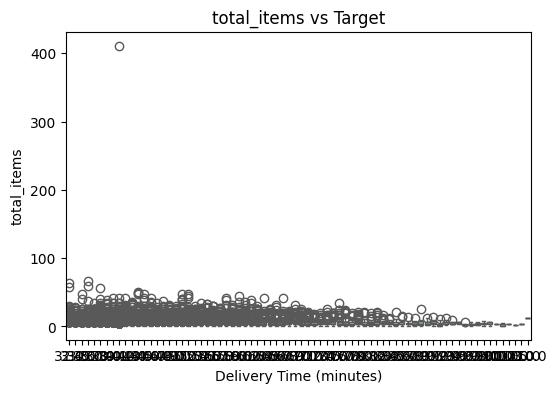

Relationship: total_items shows correlation 0.225 with Delivery Time.


Relationship: subtotal shows correlation 0.413 with Delivery Time.


Relationship: num_distinct_items shows correlation 0.312 with Delivery Time.


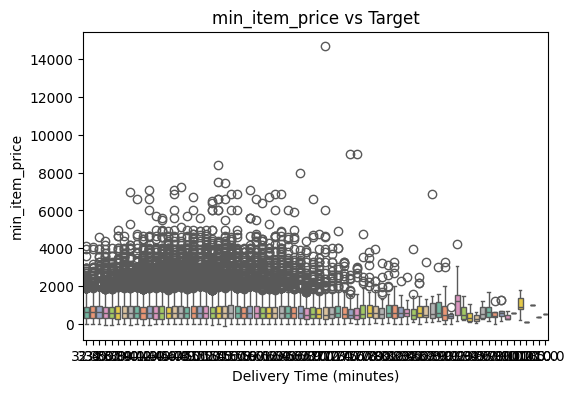

Relationship: min_item_price shows correlation 0.023 with Delivery Time.


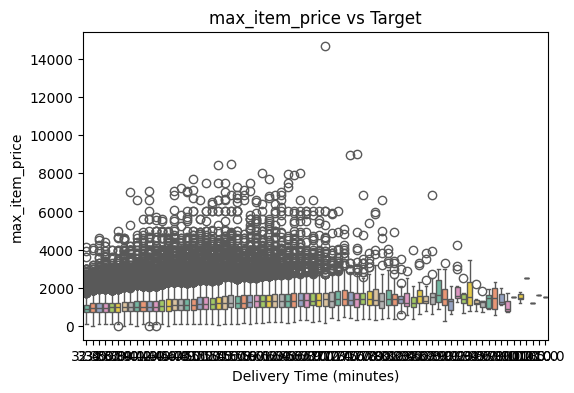

Relationship: max_item_price shows correlation 0.255 with Delivery Time.


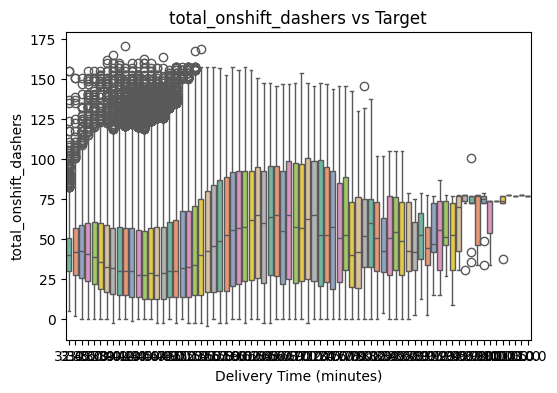

Relationship: total_onshift_dashers shows correlation 0.171 with Delivery Time.


Relationship: total_busy_dashers shows correlation 0.206 with Delivery Time.


Relationship: total_outstanding_orders shows correlation 0.385 with Delivery Time.


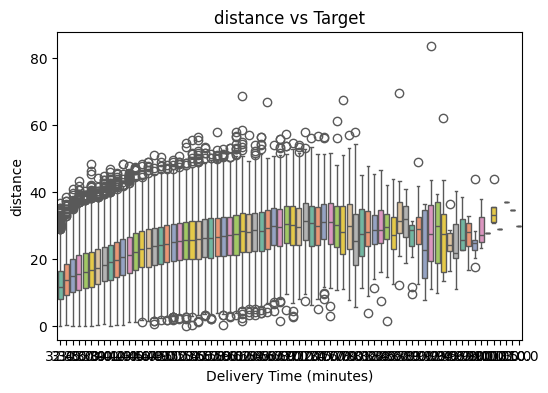

Relationship: distance shows correlation 0.460 with Delivery Time.


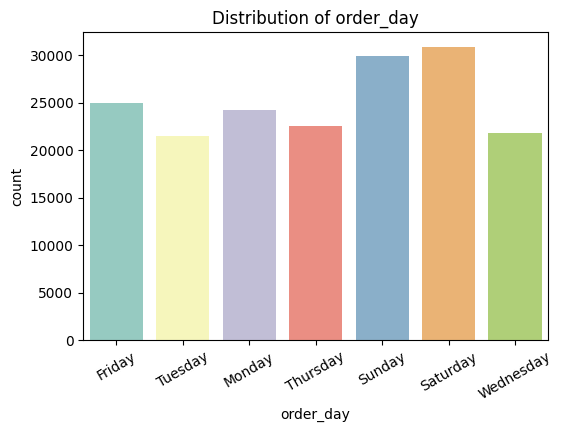

Insight: order_day distribution → {'Saturday': 30858, 'Sunday': 29893, 'Friday': 25004, 'Monday': 24202, 'Thursday': 22584, 'Wednesday': 21753, 'Tuesday': 21483}


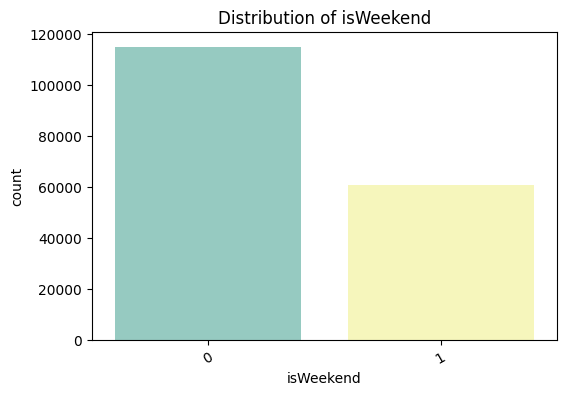

Insight: isWeekend distribution → {0: 115026, 1: 60751}


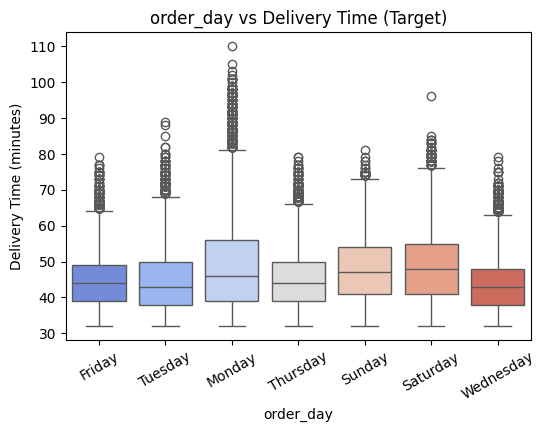

Average Delivery Time by order_day:
order_day
Friday       44.410694
Monday       48.645814
Saturday     48.480848
Sunday       47.409795
Thursday     44.907811
Tuesday      44.541498
Wednesday    43.641337
Name: delivery_time_minutes, dtype: float64


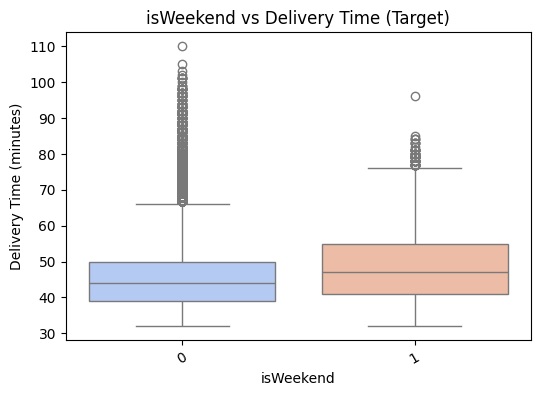

Average Delivery Time by isWeekend:
isWeekend
0    45.278320
1    47.953828
Name: delivery_time_minutes, dtype: float64


In [223]:
# -------------------------------------------
# Define numerical and categorical columns
# -------------------------------------------
print("Columns in the dataset:")
print(df.columns.tolist())

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

print("\nSummary statistics for numerical columns:")
print(X[numerical_cols].describe())

print("\nSample unique values for categorical columns:")
for col in categorical_cols:
    print(f"{col}: {X[col].unique()[:10]} ...")  

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# Plot distributions for numerical features
# -------------------------------------------
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()

    print(f"Insight: {col} distribution → "
          f"Mean={X[col].mean():.2f}, Std={X[col].std():.2f}, "
          f"Skew={X[col].skew():.2f}")

# -------------------------------------------
# Boxplots for numerical vs target
# -------------------------------------------
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=X[col], palette="Set2")
    plt.title(f"{col} vs Target")
    plt.xlabel("Delivery Time (minutes)")
    plt.ylabel(col)
    plt.show()

    corr = np.corrcoef(X[col], y)[0,1]
    print(f"Relationship: {col} shows correlation {corr:.3f} with Delivery Time.")

# -------------------------------------------
# Plot categorical features
# -------------------------------------------
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=X, x=col, palette="Set3")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()

    print(f"Insight: {col} distribution → {X[col].value_counts().to_dict()}")

# -------------------------------------------
# Boxplots for categorical vs target
# -------------------------------------------
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X[col], y=y, palette="coolwarm")
    plt.title(f"{col} vs Delivery Time (Target)")
    plt.xlabel(col); plt.ylabel("Delivery Time (minutes)")
    plt.xticks(rotation=30)
    plt.show()

    grouped = y.groupby(X[col]).mean()
    print(f"Average Delivery Time by {col}:")
    print(grouped)




##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

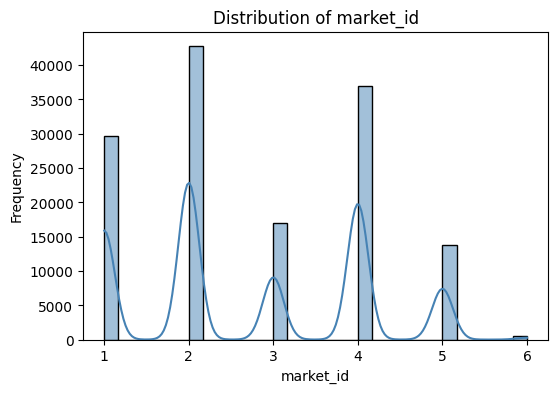

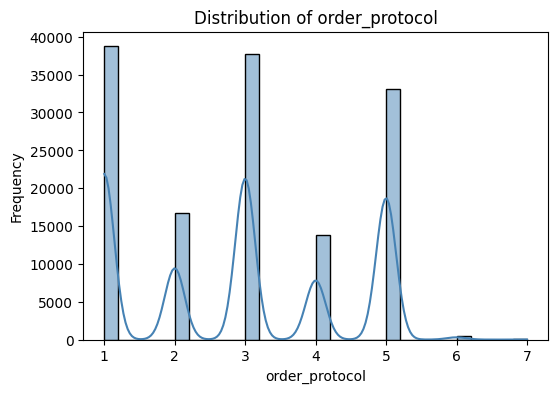

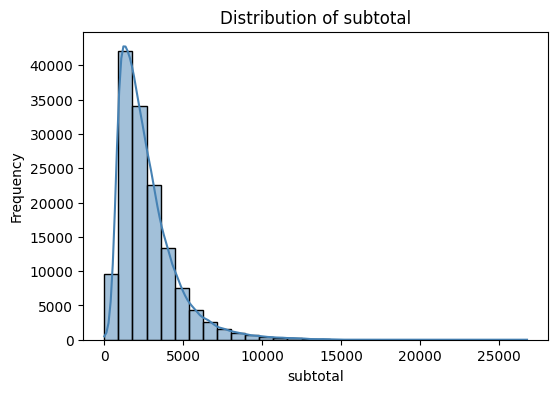

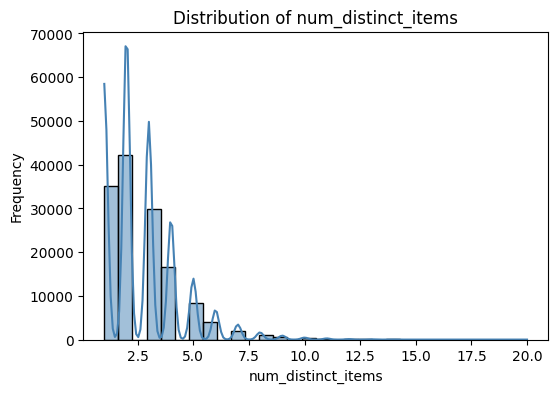

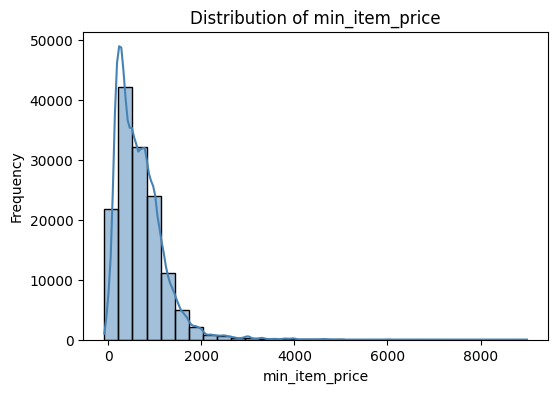

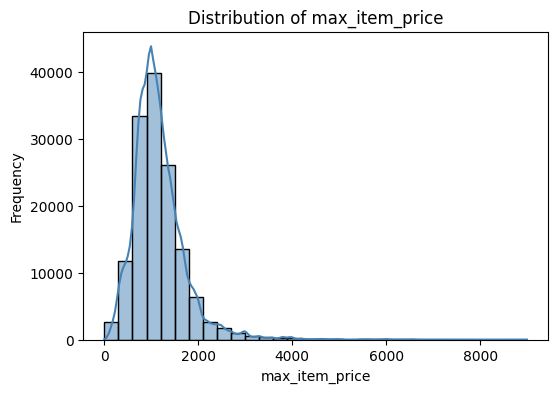

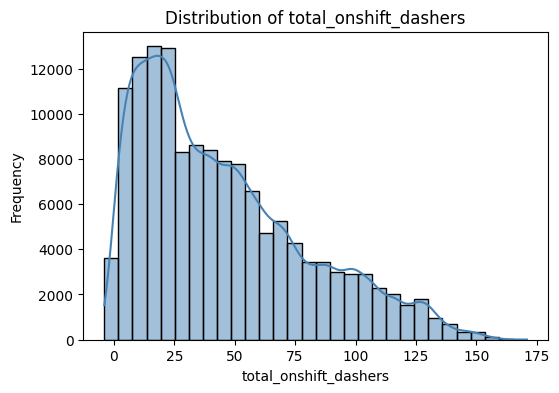

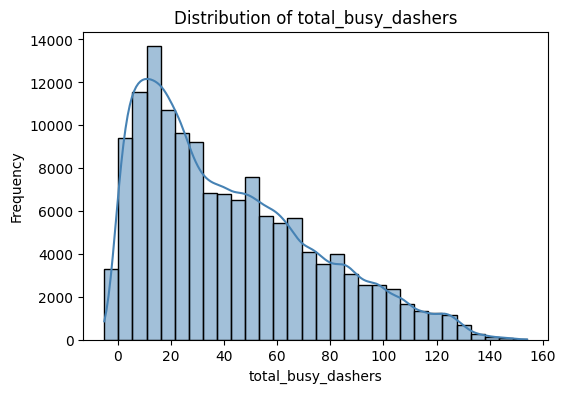

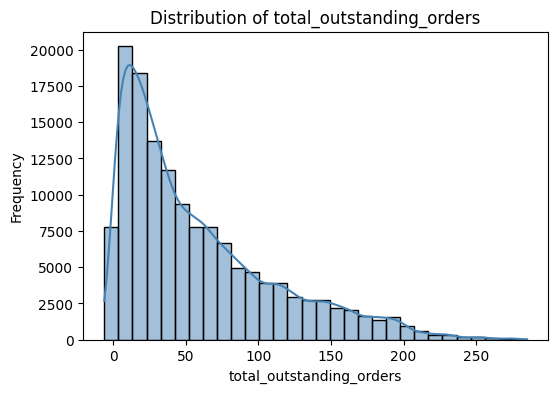

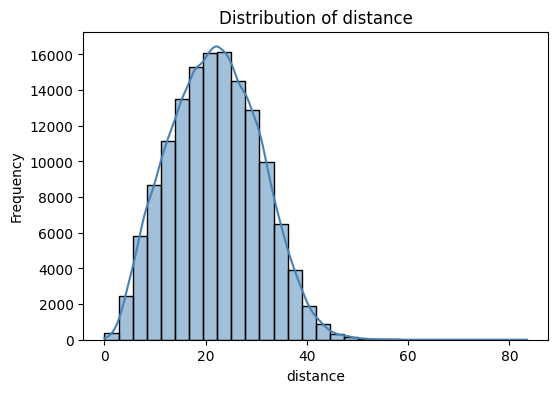

In [224]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for all numerical columns in the training set
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

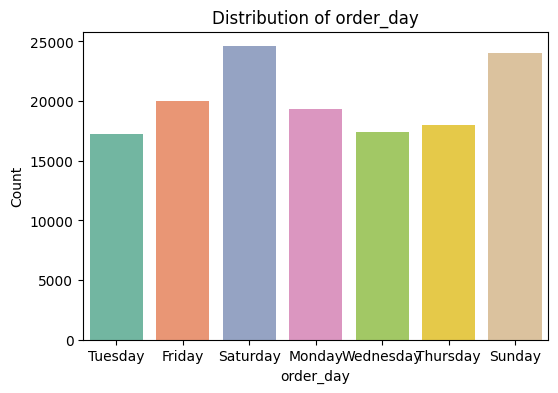

Value counts for order_day:
order_day
Saturday     24587
Sunday       23992
Friday       19995
Monday       19362
Thursday     18010
Wednesday    17434
Tuesday      17241
Name: count, dtype: int64 



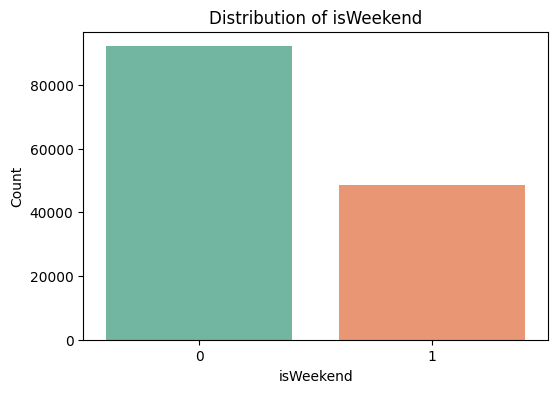

Value counts for isWeekend:
isWeekend
0    92042
1    48579
Name: count, dtype: int64 



In [157]:
# Distribution of categorical columns

# Distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_train[col], palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Print unique value counts for quick check
    print(f"Value counts for {col}:")
    print(X_train[col].value_counts(), "\n")


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

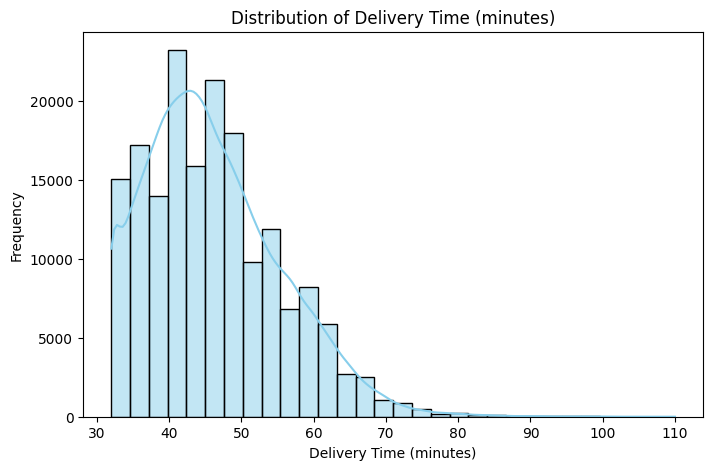

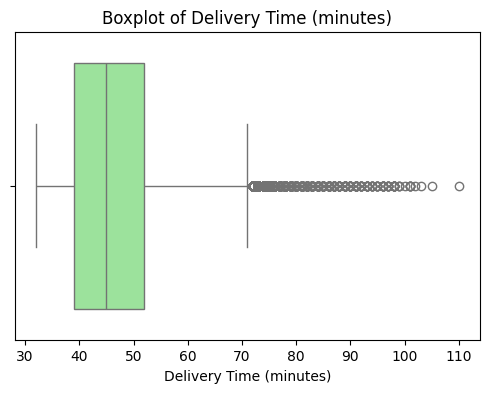

Summary Statistics of Target Variable:
count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: delivery_time_minutes, dtype: float64


In [158]:
# Distribution of time_taken
# Distribution of target variable (delivery time in minutes)
plt.figure(figsize=(8,5))
sns.histplot(y, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to see skewness and outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=y, color="lightgreen")
plt.title("Boxplot of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.show()

# Print summary statistics
print("Summary Statistics of Target Variable:")
print(y.describe())



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

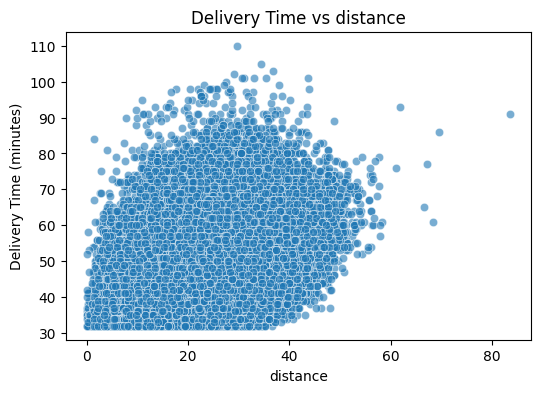

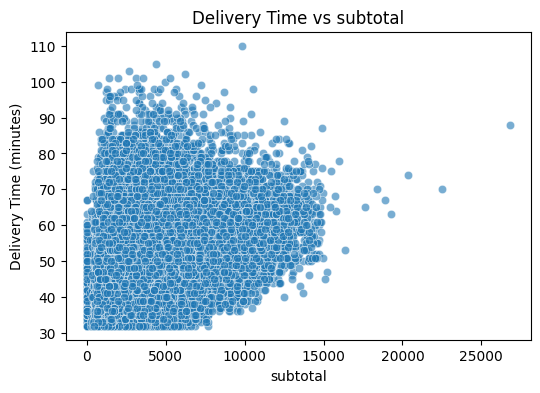

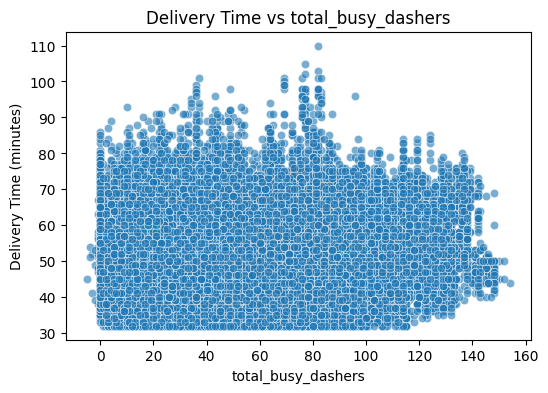

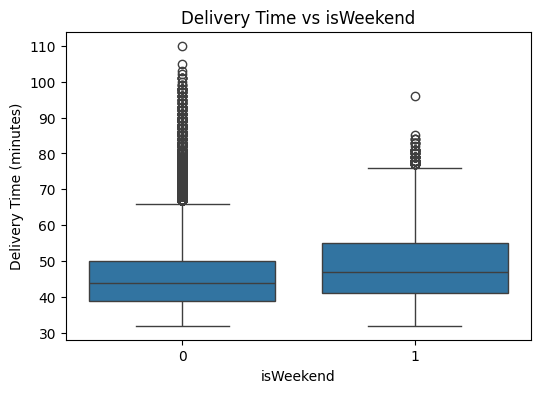

In [159]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plots for important numerical features vs target
numerical_to_plot = ["distance", "subtotal", "num_distinct_items", "total_busy_dashers"]

for col in numerical_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[col], y=y, alpha=0.6)
    plt.title(f"Delivery Time vs {col}")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")
    plt.show()

# Boxplot for categorical features vs target
categorical_to_plot = ["isWeekend"]

for col in categorical_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X[col], y=y)
    plt.title(f"Delivery Time vs {col}")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")
    plt.show()


['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'order_hour', 'order_day', 'order_day_num', 'isWeekend']


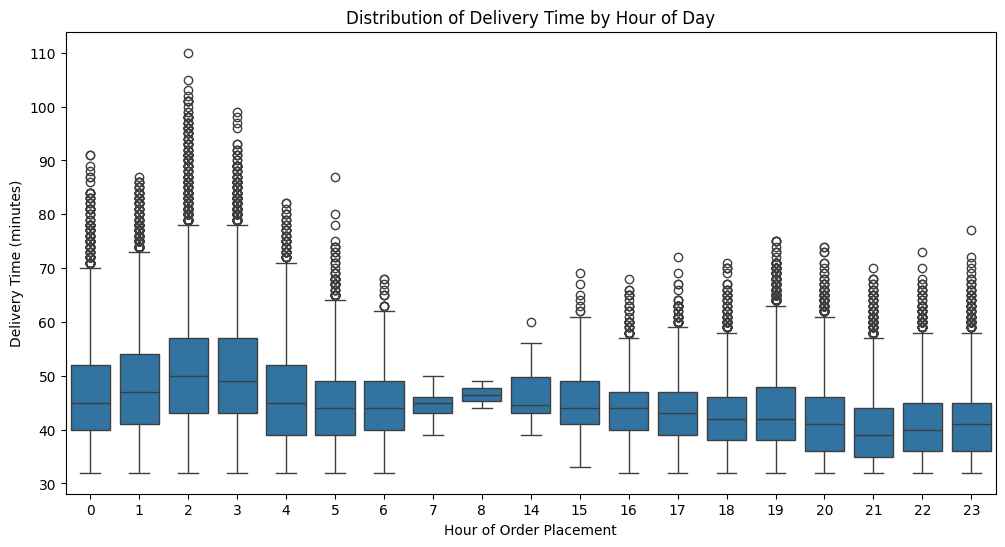

In [160]:
# Show the distribution of time_taken for different hours

print(df.columns.tolist())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x="order_hour", y="delivery_time_minutes", data=df)

plt.title("Distribution of Delivery Time by Hour of Day")
plt.xlabel("Hour of Order Placement")
plt.ylabel("Delivery Time (minutes)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="order_day", y="delivery_time_minutes", data=df)

plt.title("Distribution of Delivery Time by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (minutes)")
plt.show()







#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

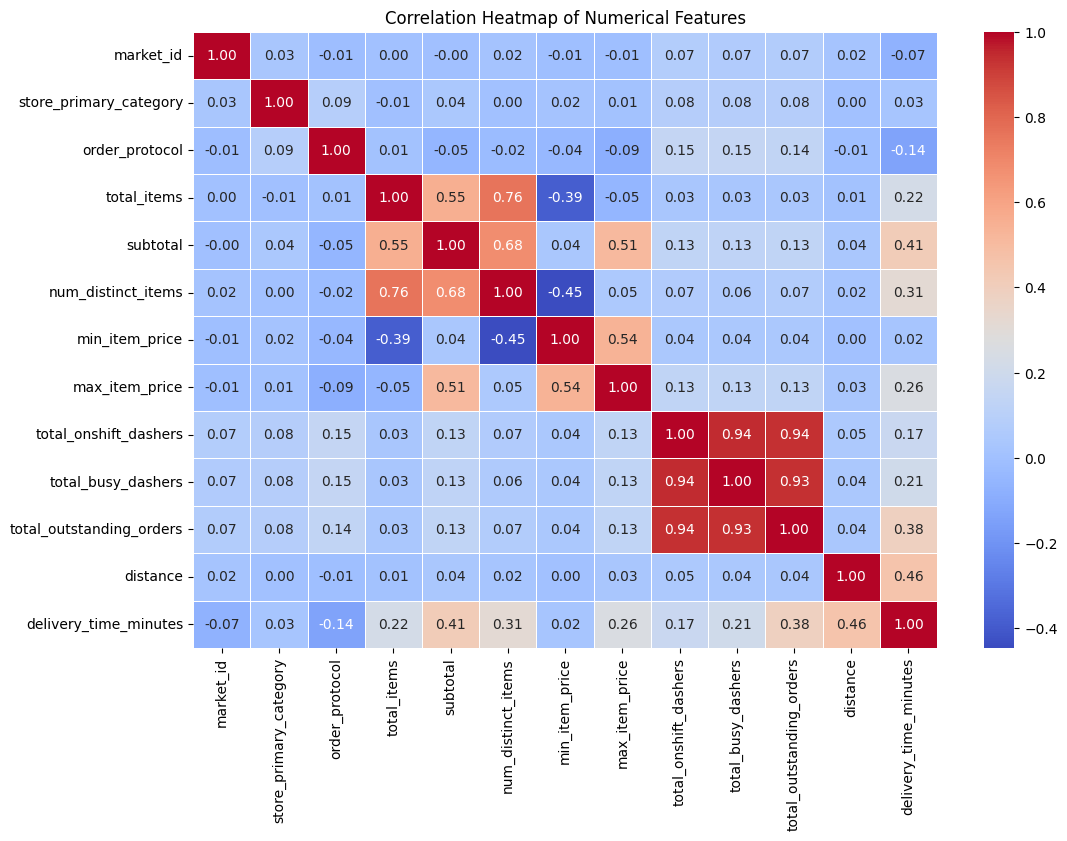

In [228]:
# Plot the heatmap of the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()




##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [162]:
# Drop 3-5 weakly correlated columns from training dataset

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])
# Compute correlation matrix
correlations = numeric_df.corr()["delivery_time_minutes"].sort_values(ascending=False)

print("Correlation with target variable:\n", correlations)

# Exclude target itself
correlations_no_target = correlations.drop("delivery_time_minutes")
# Select 3–5 weakest features
weakest_features = correlations_no_target.abs().sort_values().head(5).index.tolist()
print("Dropping weakly correlated features:", weakest_features)
# Drop from dataframe
df_reduced = df.drop(columns=weakest_features)
print("Remaining columns:", df_reduced.columns.tolist())



Correlation with target variable:
 delivery_time_minutes       1.000000
distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
order_day_num               0.045878
store_primary_category      0.026973
min_item_price              0.022753
market_id                  -0.073016
order_protocol             -0.136755
order_hour                 -0.346366
Name: delivery_time_minutes, dtype: float64
Dropping weakly correlated features: ['min_item_price', 'store_primary_category', 'order_day_num', 'market_id', 'order_protocol']
Remaining columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_minutes', 'order_hour', 'order_day', 'isWeekend

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

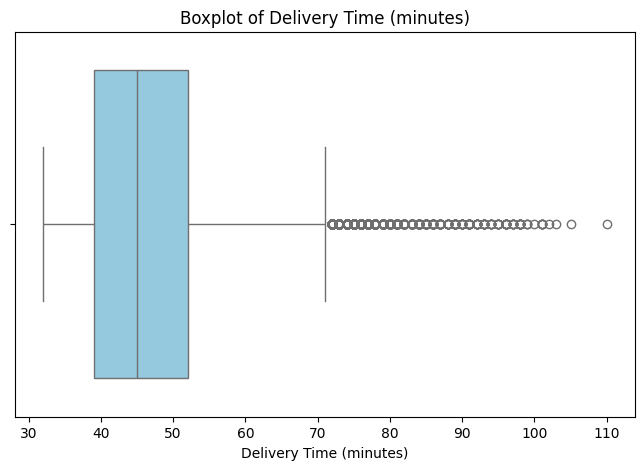

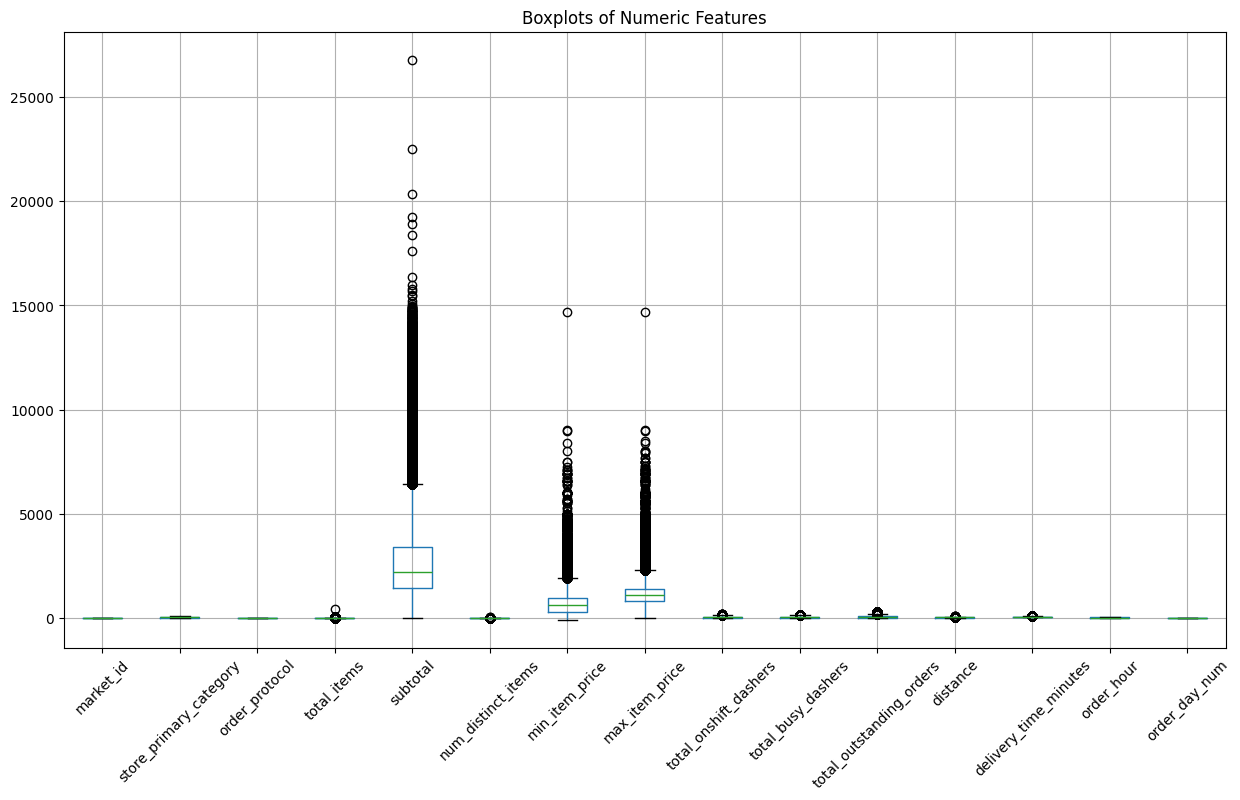

In [163]:
# Boxplot for time_taken
import matplotlib.pyplot as plt
import seaborn as sns

# Pick target variable
target_col = "delivery_time_minutes"

# Boxplot for target variable
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target_col], color="skyblue")
plt.title("Boxplot of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.show()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

# Boxplots for all numeric features
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

Outliers handled in column: market_id
Original range: 1.0 - 6.0
Adjusted range: 1.0 - 6.0
--------------------------------------------------
Outliers handled in column: store_primary_category
Original range: 0 - 72
Adjusted range: 0.0 - 72.0
--------------------------------------------------
Outliers handled in column: order_protocol
Original range: 1.0 - 7.0
Adjusted range: 1.0 - 7.0
--------------------------------------------------
Outliers handled in column: total_items
Original range: 1 - 411
Adjusted range: 1.0 - 7.0
--------------------------------------------------
Outliers handled in column: subtotal
Original range: 0 - 26800
Adjusted range: 0.0 - 6407.0
--------------------------------------------------
Outliers handled in column: num_distinct_items
Original range: 1 - 20
Adjusted range: 1.0 - 6.0
--------------------------------------------------
Outliers handled in column: min_item_price
Original range: -86 - 14700
Adjusted range: -86.0 - 1906.5
----------------------------

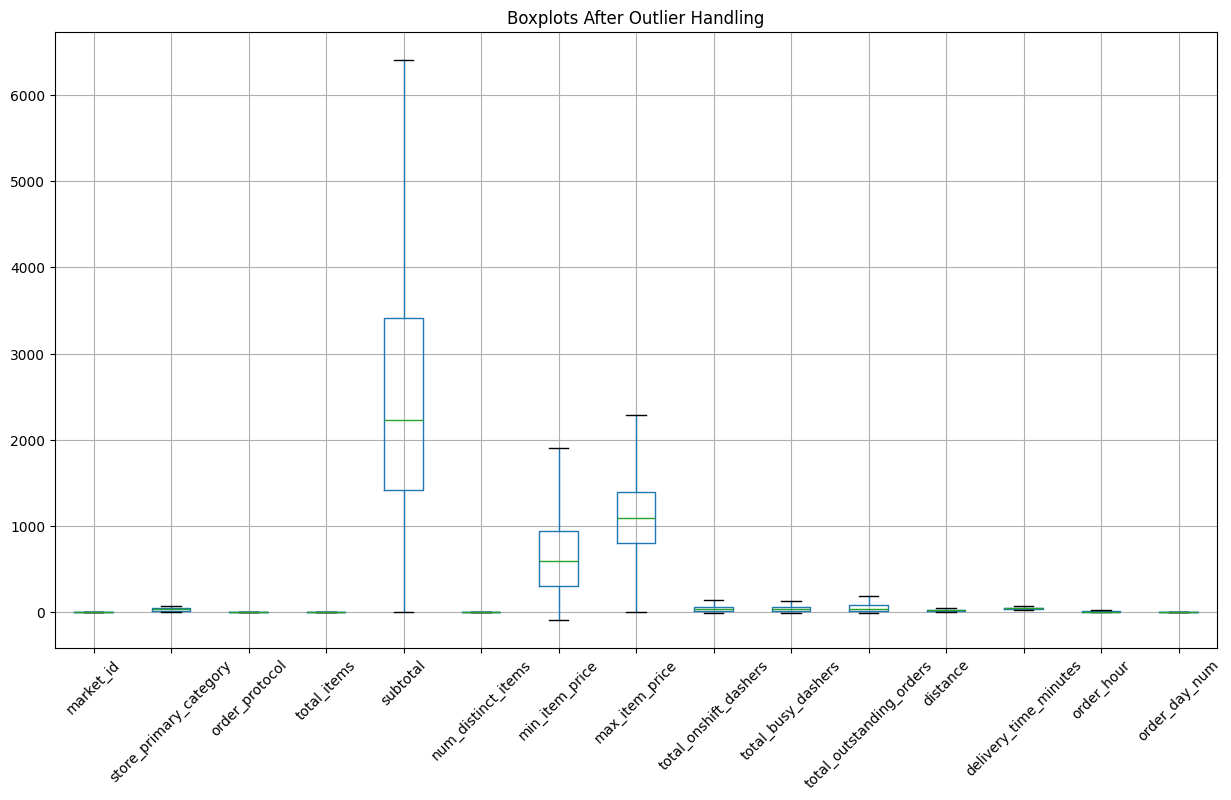

In [164]:
# Handle outliers

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

def handle_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound,
                          np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col]))
        print(f"Outliers handled in column: {col}")
        print(f"Original range: {df[col].min()} - {df[col].max()}")
        print(f"Adjusted range: {df_clean[col].min()} - {df_clean[col].max()}")
        print("-" * 50)
    return df_clean

# Apply to all numeric columns
df = handle_outliers_iqr(df, numeric_cols)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplots After Outlier Handling")
plt.xticks(rotation=45)
plt.show()


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [165]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Define target and features
target_col = "delivery_time_minutes"   # target variable
feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols]
y = df[target_col]

from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

# Detect numerical and categorical columns automatically
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)



Training set size: (140621, 16)
Validation set size: (35156, 16)
Numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_num']
Categorical columns: ['order_day', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

Numerical columns in validation set: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_num']


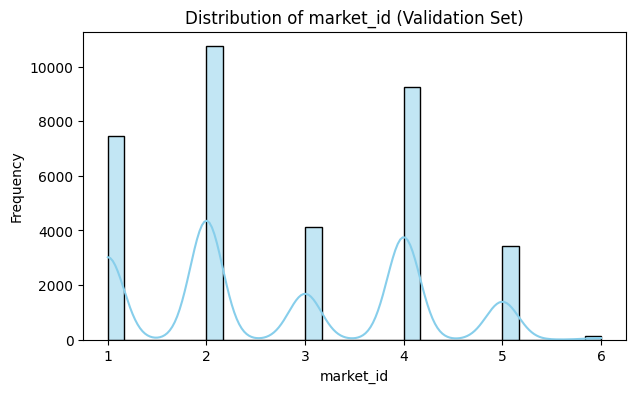

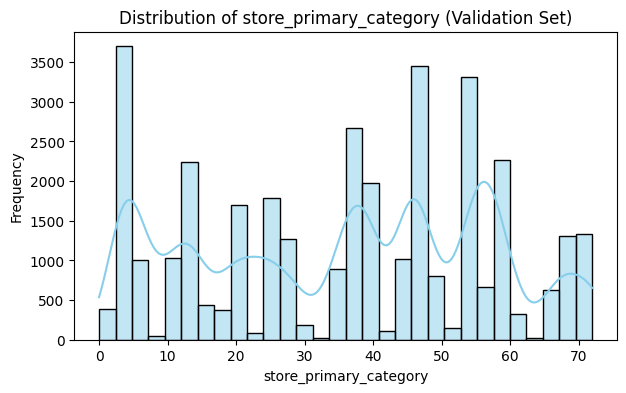

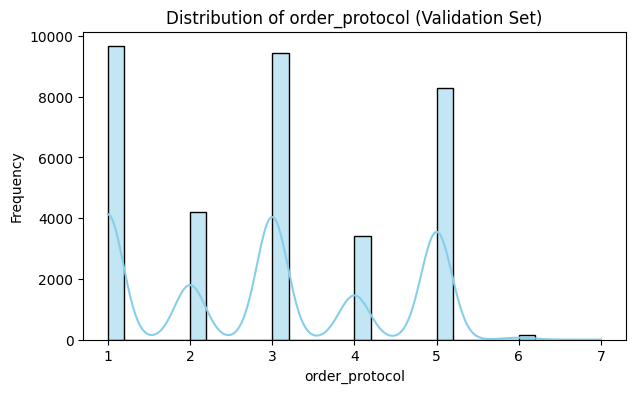

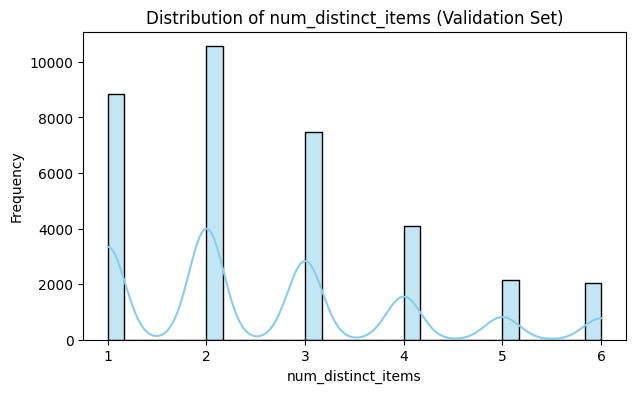

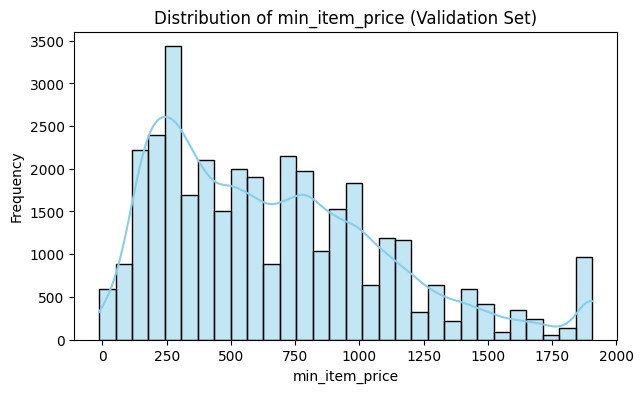

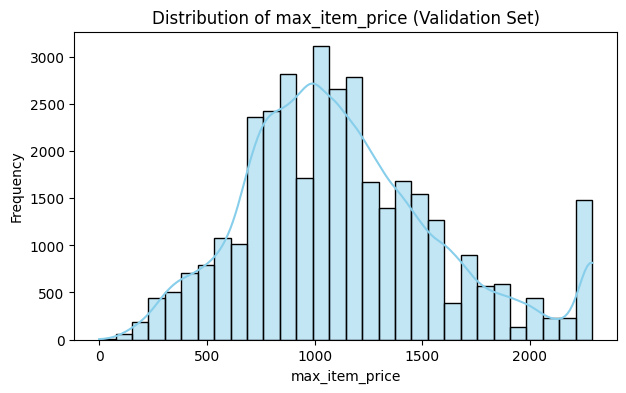

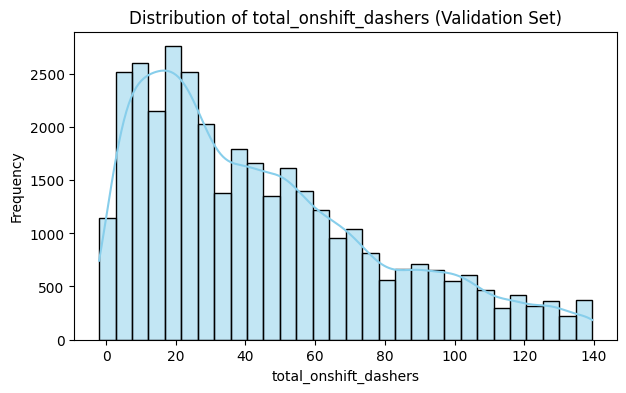

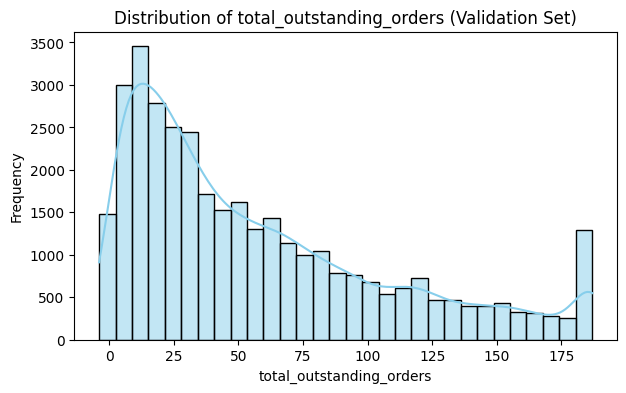

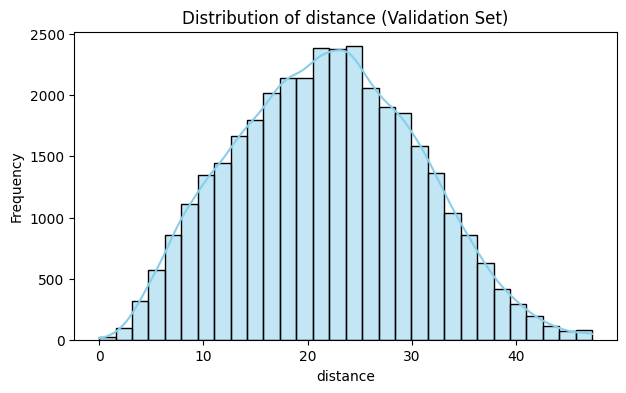

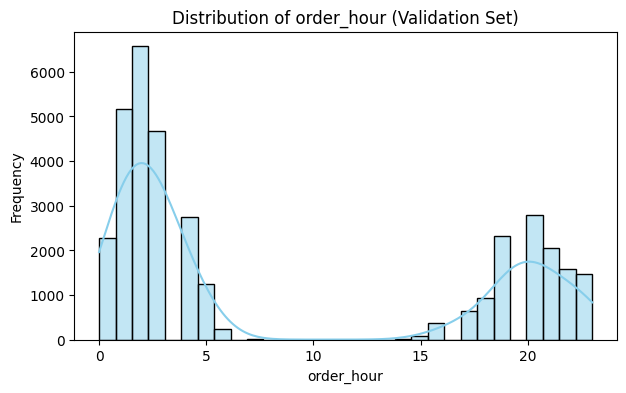

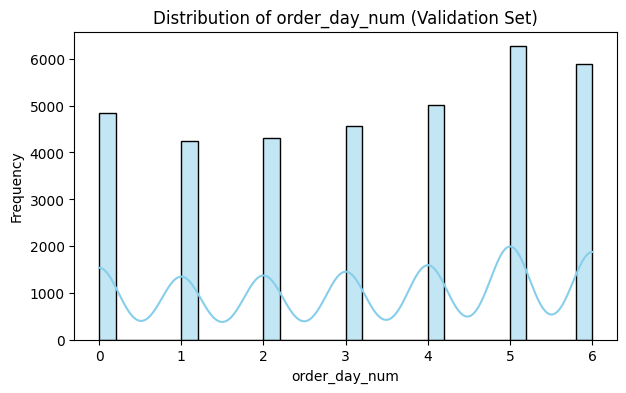

In [166]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns from validation set
numerical_cols_val = X_val.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical columns in validation set:", numerical_cols_val)
# Plot distributions
for col in numerical_cols_val:
    plt.figure(figsize=(7, 4))
    sns.histplot(X_val[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col} (Validation Set)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

Categorical columns in validation set: ['order_day', 'isWeekend']


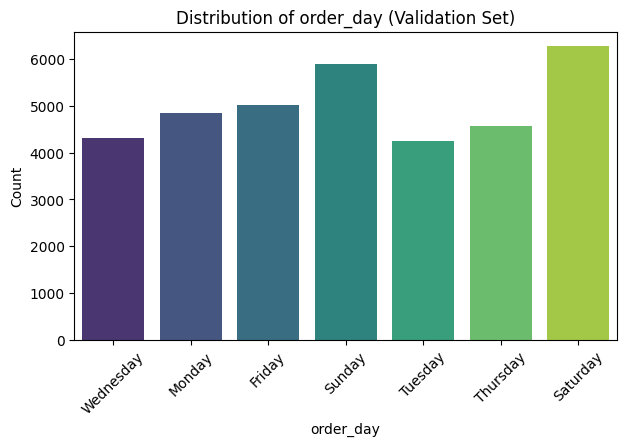

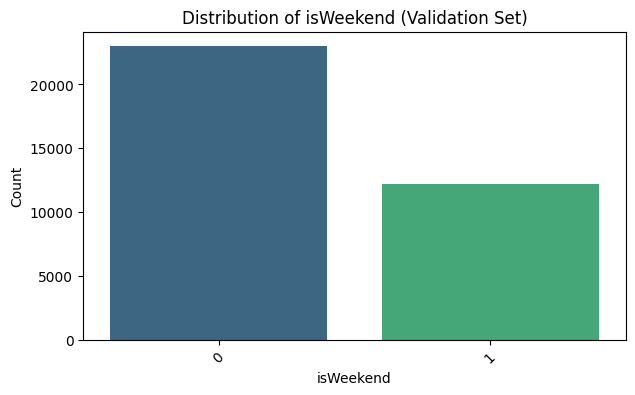

In [167]:
# Distribution of categorical columns

# Select categorical columns
categorical_cols_val = X_val.select_dtypes(include=["category", "object", "bool"]).columns.tolist()
print("Categorical columns in validation set:", categorical_cols_val)
# Plot distributions
for col in categorical_cols_val:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=X_val[col], palette="viridis")
    plt.title(f"Distribution of {col} (Validation Set)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [168]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=30, kde=True, color="orange")
plt.title("Distribution of Delivery Time (minutes)", fontsize=14)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

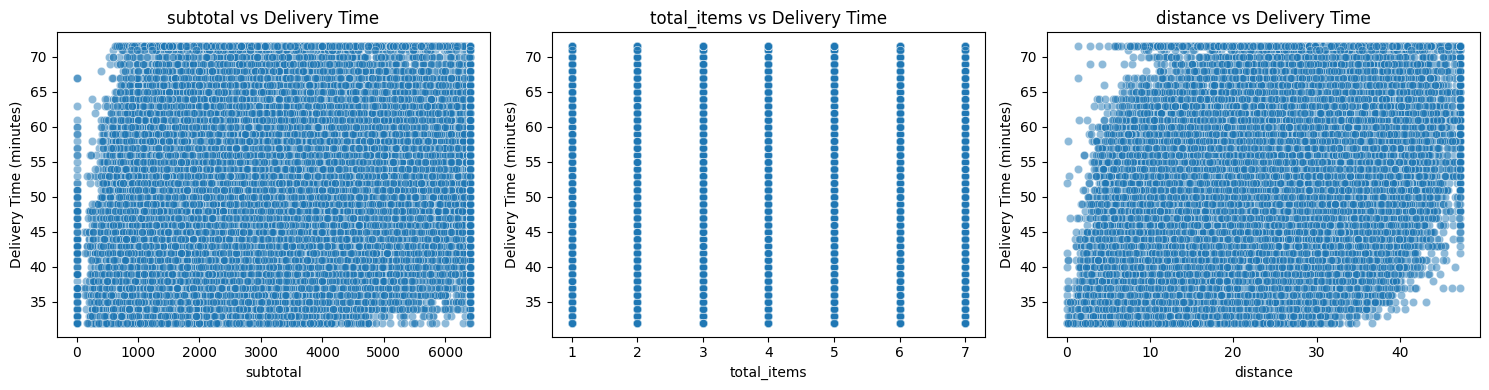

In [169]:
# Scatter plot to visualise the relationship between time_taken and other features
# Pick a few important numerical features
num_features = ["subtotal", "total_items", "distance"]
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.title(f"{col} vs Delivery Time")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [170]:
# Drop the weakly correlated columns from training dataset
# 1. Select only numerical columns for correlation
num_df = X_train.select_dtypes(include=[np.number])
# 2. Compute correlation with target variable
correlations = num_df.corrwith(y_train)
print("Correlations with delivery_time_minutes:")
print(correlations.sort_values(ascending=False))
# 3. Choose a threshold for weak correlation (example: |corr| < 0.05)
weak_corr_cols = correlations[correlations.abs() < 0.05].index.tolist()
print("\nDropping weakly correlated columns:", weak_corr_cols)
# 4. Drop from both training and validation sets
X_train_reduced = X_train.drop(columns=weak_corr_cols)
X_val_reduced = X_val.drop(columns=weak_corr_cols)
print("\nRemaining features after dropping weak ones:")
print(X_train_reduced.columns.tolist())


Correlations with delivery_time_minutes:
distance                    0.465633
subtotal                    0.418901
total_outstanding_orders    0.376249
num_distinct_items          0.308040
total_items                 0.284677
max_item_price              0.268523
total_busy_dashers          0.208240
total_onshift_dashers       0.173728
order_day_num               0.053914
store_primary_category      0.026366
min_item_price              0.008877
market_id                  -0.072348
order_protocol             -0.140559
order_hour                 -0.348551
dtype: float64

Dropping weakly correlated columns: ['store_primary_category', 'min_item_price']

Remaining features after dropping weak ones:
['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day', 'order_day_num', 'isWeekend']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
# Import libraries for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Libraries for linear regression imported successfully")


Libraries for linear regression imported successfully


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [173]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler
# Identify numerical columns (excluding target variable)
numeric_cols = X_train_reduced.select_dtypes(include=[np.number]).columns.tolist()
# Initialize scaler
scaler = StandardScaler()
# Fit on training data and transform both train and validation
X_train_scaled = X_train_reduced.copy()
X_val_scaled = X_val_reduced.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_reduced[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val_reduced[numeric_cols])
print("Feature scaling applied on numerical columns")
print("Scaled features preview (train):")
print(X_train_scaled.head())

Feature scaling applied on numerical columns
Scaled features preview (train):
        market_id  order_protocol  total_items  subtotal  num_distinct_items  \
102712  -0.559594       -0.602448    -1.149075 -1.167063           -1.131078   
94576    0.943226        0.058411    -1.149075 -1.052908           -1.131078   
49784   -1.311004        0.058411     0.559700 -0.371234            0.969810   
37753    0.191816       -1.263308    -0.579483 -0.152055           -0.430782   
91728   -0.559594       -1.263308    -1.149075 -0.769149           -1.131078   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712       -0.838500              -0.286914           -0.089125   
94576        -0.300282               1.891894            0.937172   
49784        -0.515569              -1.129387           -1.208721   
37753         0.569478              -0.838879           -0.773323   
91728         0.399401               0.555558            0.159675   

        total_outstanding_

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [232]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
# Initialise the model
lin_reg_model = LinearRegression()
print("Linear Regression model initialised (scikit-learn)")

Linear Regression model initialised (scikit-learn)


In [233]:
# Train the model using the training data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Identify categorical and numerical columns
categorical_cols = ["store_primary_category", "order_day"]  # update with your categorical cols
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
# Create column transformer for encoding + scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
# Fit and transform training data, transform validation data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
print("Preprocessing done. Shape after encoding:", X_train_preprocessed.shape)
lin_reg_model.fit(X_train_preprocessed, y_train)
print("Model trained successfully after encoding categorical variables.")


Preprocessing done. Shape after encoding: (140621, 93)
Model trained successfully after encoding categorical variables.


In [236]:
# Make predictions

# Predict on validation set
y_val_pred = lin_reg_model.predict(X_val_preprocessed)
# Show first 10 predictions vs actuals
results = pd.DataFrame({
    "Actual": y_val.values[:10],
    "Predicted": y_val_pred[:10]
})
print("Predictions made successfully!")
print(results)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
# Example: new order
new_order = pd.DataFrame([{
    "market_id": 2,
    "store_primary_category": "Pizza",
    "order_protocol": 3,
    "total_items": 5,
    "subtotal": 2500,
    "num_distinct_items": 3,
    "min_item_price": 300,
    "max_item_price": 800,
    "total_onshift_dashers": 25,
    "total_busy_dashers": 12,
    "total_outstanding_orders": 18,
    "distance": 5.5,
    "order_hour": 19,
    "order_day": "Tuesday",
    "order_day_num": 1,
    "isWeekend": 0
}])

# Apply preprocessing
new_order_preprocessed = preprocessor.transform(new_order)
# Predict
predicted_time = lin_reg_model.predict(new_order_preprocessed)
print(f"Predicted delivery time: {predicted_time[0]:.2f} minutes")


Predictions made successfully!
   Actual  Predicted
0    50.0  50.519824
1    69.0  65.623756
2    41.0  41.242141
3    45.0  41.337217
4    40.0  40.282016
5    36.0  28.082787
6    34.0  35.361981
7    43.0  42.339979
8    32.0  30.881310
9    46.0  46.825242
Model Evaluation:
Mean Absolute Error (MAE): 2.40
Root Mean Squared Error (RMSE): 3.31
R² Score: 0.87
Predicted delivery time: 32.21 minutes


In [237]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
# Print results
print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Results:
Mean Absolute Error (MAE): 2.40
Root Mean Squared Error (RMSE): 3.31
R² Score: 0.87


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [239]:
# Select the most relevant 8 features with RFE (scikit-learn)

from sklearn.preprocessing import OneHotEncoder
# Correct for your sklearn version:
OneHotEncoder(handle_unknown="ignore", sparse_output=False)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# 1) Identify column types
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# 2) Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop"
)
# 3) Pipeline with RFE (8 features)
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=8)
pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("rfe", rfe_selector),
    ("lr", LinearRegression())
])
# 4) Fit
pipe.fit(X_train, y_train)
# 5) Predict
y_val_pred = pipe.predict(X_val)
# 6) Metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(f"Final 8-feature model | RMSE={rmse:.3f} | R²={r2:.3f}")
# 7) Get selected features
feature_names = pipe.named_steps["prep"].get_feature_names_out()
support_mask = pipe.named_steps["rfe"].support_
selected_features = [f for f, keep in zip(feature_names, support_mask) if keep]
print("\nSelected 8 features (after preprocessing):")
for f in selected_features:
    print(" -", f)

# Loop through the number of features and test the model



Final 8-feature model | RMSE=3.648 | R²=0.841

Selected 8 features (after preprocessing):
 - num__subtotal
 - num__total_onshift_dashers
 - num__total_busy_dashers
 - num__total_outstanding_orders
 - num__distance
 - num__order_hour
 - cat__order_day_Tuesday
 - cat__order_day_Wednesday


In [240]:
# Build the final model with selected number of features

# ------------------------------------------------------------
# Build the final model with the selected (RFE) features
# ------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1) Reuse the already-fitted pipeline `pipe` (prep -> RFE -> LR)
#    - If you followed earlier steps, `pipe` is already fitted on X_train, y_train.
#    - We’ll extract the selected-feature mask from RFE and refit a clean LR.

# Get the fitted preprocessor and RFE selector
prep = pipe.named_steps["prep"]
rfe  = pipe.named_steps["rfe"]
# Transform train/val with the (already-fitted) preprocessor
Xtr = prep.transform(X_train)
Xva = prep.transform(X_val)
# Selected feature mask
support_mask = rfe.support_
# Optional: human-readable post-preprocessing feature names
try:
    feature_names = prep.get_feature_names_out().tolist()
except Exception:
    feature_names = [f"f_{i}" for i in range(Xtr.shape[1])]

selected_feature_names = [n for n, keep in zip(feature_names, support_mask) if keep]
print("Selected features used in the final model:")
for f in selected_feature_names:
    print(" -", f)

# 2) Reduce to the selected features
Xtr_sel = Xtr[:, support_mask]
Xva_sel = Xva[:, support_mask]

# 3) Fit a clean Linear Regression on the reduced features
final_lr = LinearRegression()
final_lr.fit(Xtr_sel, y_train)

# 4) Evaluate on validation set
y_val_pred_final = final_lr.predict(Xva_sel)
rmse_final = np.sqrt(mean_squared_error(y_val, y_val_pred_final))
r2_final   = r2_score(y_val, y_val_pred_final)

print(f"\nFinal model (using {support_mask.sum()} features) performance:")
print(f"RMSE: {rmse_final:.3f}")
print(f"R²  : {r2_final:.3f}")

# 5) (Optional) Coefficients table for interpretation
coef_df = pd.DataFrame({
    "feature": selected_feature_names,
    "coef": final_lr.coef_
}).sort_values("coef", key=lambda s: s.abs(), ascending=False)

print("\nTop coefficients (by absolute magnitude):")
print(coef_df.head(10).to_string(index=False))

# 6) (Optional) Save artifacts you’ll reuse later (preprocessor, mask, final model)
final_artifacts = {
    "preprocessor": prep,
    "selected_mask": support_mask,
    "selected_feature_names": selected_feature_names,
    "model": final_lr
}


Selected features used in the final model:
 - num__subtotal
 - num__total_onshift_dashers
 - num__total_busy_dashers
 - num__total_outstanding_orders
 - num__distance
 - num__order_hour
 - cat__order_day_Tuesday
 - cat__order_day_Wednesday

Final model (using 8 features) performance:
RMSE: 3.648
R²  : 0.841

Top coefficients (by absolute magnitude):
                      feature       coef
num__total_outstanding_orders  18.409388
   num__total_onshift_dashers -12.900003
      num__total_busy_dashers  -4.533832
                num__distance   4.175637
                num__subtotal   3.097655
              num__order_hour  -2.281589
       cat__order_day_Tuesday  -1.915607
     cat__order_day_Wednesday  -1.904614


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

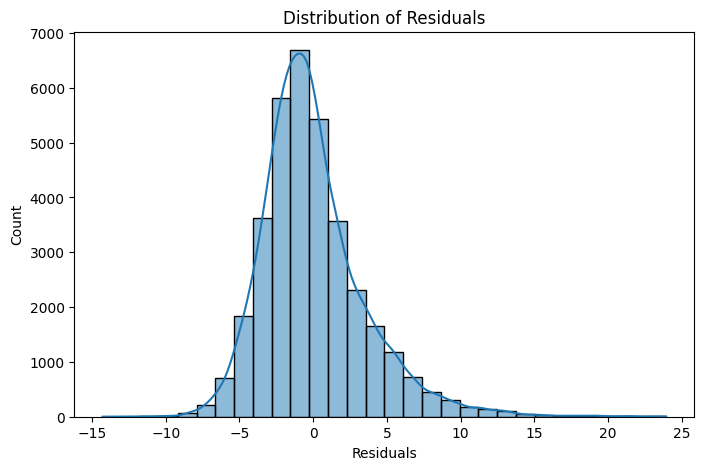

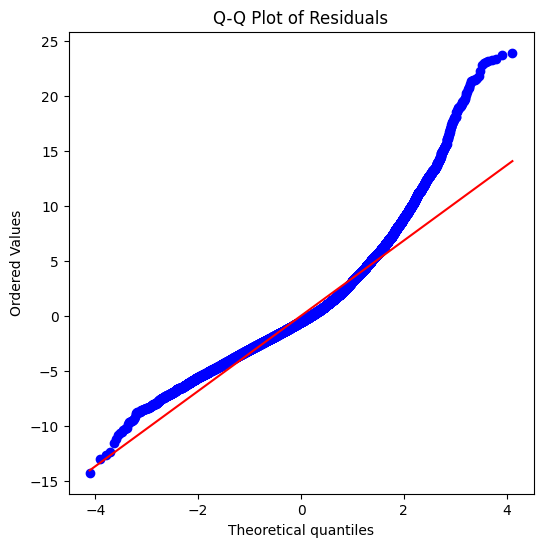

In [182]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 1. Residuals
residuals = y_val - y_val_pred_final
# --------------------------------------------------------
# Residuals vs Predicted Values
# --------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_val_pred_final, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
# --------------------------------------------------------
# Histogram of Residuals
# --------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()
# --------------------------------------------------------
# Q-Q Plot (Normality check)
# --------------------------------------------------------
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


[Your inferences here:]



Residuals vs Predicted Values
The residuals show a funnel-shaped pattern rather than being randomly scattered around zero.
This indicates heteroscedasticity (non-constant variance), meaning the model may not be capturing all variance in delivery times well.
Ideally, residuals should be randomly distributed with no clear pattern.

Distribution of Residuals (Histogram)
The residuals are approximately centered around zero, which is good.
The shape is close to a normal distribution, but slightly skewed to the right.
This suggests the model predictions are generally unbiased, but there may be some underestimation of higher delivery times.

Q-Q Plot (Normality Check)
The Q-Q plot shows residuals deviating from the straight line at both tails.
This means residuals are not perfectly normally distributed, especially for extreme values.
The deviation suggests potential outliers or non-linear effects that the linear regression model didn’t fully capture.

Overall Conclusion:
The residual analysis indicates that while the model captures the central trend fairly well, issues like heteroscedasticity, slight skewness, and non-normality of residuals remain.
This suggests that the linear regression model could be improved by transformations, adding interaction terms, or trying more advanced models (e.g., Random Forest, Gradient Boosting).

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [242]:
# Compare the scaled vs unscaled features used in the final model

# ================================================
# Final, robust RFE + Linear Regression workflow
# ================================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---- 1) Detect dtypes from TRAIN set ----
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# ---- 2) Preprocessor (version-safe for OneHotEncoder) ----
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # new sklearn
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # older sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop"
)

# ---- 3) Fit preprocessor and transform data ----
Xtr = preprocessor.fit_transform(X_train)
Xva = preprocessor.transform(X_val)
# Get engineered feature names
feature_names = []
try:
    feature_names = preprocessor.get_feature_names_out().tolist()
except AttributeError:
    # Fallback: build names manually
    # Numeric names:
    num_names = [f"num__{c}" for c in num_cols]
    # OHE names:
    if hasattr(preprocessor.named_transformers_["cat"], "get_feature_names_out"):
        cat_ohe_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
    else:
        # Generic placeholders if very old sklearn
        cat_ohe_names = [f"cat__{c}__lvl_{i}" for c in cat_cols for i in range(999)]
    feature_names = num_names + cat_ohe_names

n_total = Xtr.shape[1]
print(f"Engineered features: {n_total}")
# ---- 4) RFE to select the top 8 engineered features ----
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(Xtr, y_train)
support_mask = rfe.support_
selected_names = [n for n, keep in zip(feature_names, support_mask) if keep]
print("\nSelected 8 engineered features:")
for n in selected_names:
    print(" -", n)
# ---- 5) Train final LR on the selected columns ----
Xtr_sel = Xtr[:, support_mask]
Xva_sel = Xva[:, support_mask]
final_lr = LinearRegression()
final_lr.fit(Xtr_sel, y_train)
y_val_pred_final = final_lr.predict(Xva_sel)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_final))
r2   = r2_score(y_val, y_val_pred_final)
print(f"\nFinal 8-feature model | RMSE={rmse:.3f} | R²={r2:.3f}")

# ---- 6) Coefficient analysis (scaled and unscaled) ----
coef_scaled = pd.DataFrame({
    "feature_engineered": selected_names,
    "coef_scaled": final_lr.coef_
}).sort_values("coef_scaled", key=lambda s: s.abs(), ascending=False)

print("\nTop coefficients (scaled; per 1 std change for numeric features):")
print(coef_scaled.to_string(index=False))

# Unscale numeric features back to raw units:
# - Numeric engineered names look like: "num__<original_name>"
# - OHE features are not scaled; unscaled == scaled
scaler = preprocessor.named_transformers_["num"]  # StandardScaler
num_scales = dict(zip([f"num__{c}" for c in num_cols], scaler.scale_))

def unscale_one(name, coef):
    if name.startswith("num__"):
        return coef / num_scales[name]  # convert from per-std to per-raw-unit
    else:
        return coef  # OHE feature not scaled

coef_unscaled = coef_scaled.copy()
coef_unscaled["coef_unscaled"] = [
    unscale_one(n, c) for n, c in zip(coef_unscaled["feature_engineered"], coef_unscaled["coef_scaled"])
]

print("\nCoefficients in original units (numeric features only differ):")
print(coef_unscaled.to_string(index=False))

# ---- 7) Save artifacts for later use ----
final_artifacts = {
    "preprocessor": preprocessor,
    "rfe_mask": support_mask,
    "selected_feature_names": selected_names,
    "model": final_lr
}




Engineered features: 23

Selected 8 engineered features:
 - num__subtotal
 - num__total_onshift_dashers
 - num__total_busy_dashers
 - num__total_outstanding_orders
 - num__distance
 - num__order_hour
 - cat__order_day_Tuesday
 - cat__order_day_Wednesday

Final 8-feature model | RMSE=3.648 | R²=0.841

Top coefficients (scaled; per 1 std change for numeric features):
           feature_engineered  coef_scaled
num__total_outstanding_orders    18.409388
   num__total_onshift_dashers   -12.900003
      num__total_busy_dashers    -4.533832
                num__distance     4.175637
                num__subtotal     3.097655
              num__order_hour    -2.281589
       cat__order_day_Tuesday    -1.915607
     cat__order_day_Wednesday    -1.904614

Coefficients in original units (numeric features only differ):
           feature_engineered  coef_scaled  coef_unscaled
num__total_outstanding_orders    18.409388       0.348838
   num__total_onshift_dashers   -12.900003      -0.373131
      n

In [250]:
# ---- 6) Coefficient analysis (scaled and unscaled) ----
coef_scaled = pd.DataFrame({
    "feature_engineered": selected_names,
    "coef_scaled": final_lr.coef_
}).sort_values("coef_scaled", key=lambda s: s.abs(), ascending=False)

print("Top coefficients (SCALED):")
print("These represent the effect on delivery time (target) when a feature changes by 1 standard deviation.")
print(coef_scaled.to_string(index=False))

# Unscale numeric features back to raw units:
scaler = preprocessor.named_transformers_["num"]  # StandardScaler
num_scales = dict(zip([f"num__{c}" for c in num_cols], scaler.scale_))

def unscale_one(name, coef):
    if name.startswith("num__"):
        return coef / num_scales[name]  # convert from per-std to per-raw-unit
    else:
        return coef  # OHE features are not scaled

coef_unscaled = coef_scaled.copy()
coef_unscaled["coef_unscaled"] = [
    unscale_one(n, c) for n, c in zip(coef_unscaled["feature_engineered"], coef_unscaled["coef_scaled"])
]

print("Coefficients in ORIGINAL UNITS:")
print("These represent the actual change in delivery time (target) per one-unit increase in the raw feature.")
print(coef_unscaled.to_string(index=False))


Top coefficients (SCALED):
These represent the effect on delivery time (target) when a feature changes by 1 standard deviation.
           feature_engineered  coef_scaled
num__total_outstanding_orders    18.409388
   num__total_onshift_dashers   -12.900003
      num__total_busy_dashers    -4.533832
                num__distance     4.175637
                num__subtotal     3.097655
              num__order_hour    -2.281589
       cat__order_day_Tuesday    -1.915607
     cat__order_day_Wednesday    -1.904614
Coefficients in ORIGINAL UNITS:
These represent the actual change in delivery time (target) per one-unit increase in the raw feature.
           feature_engineered  coef_scaled  coef_unscaled
num__total_outstanding_orders    18.409388       0.348838
   num__total_onshift_dashers   -12.900003      -0.373131
      num__total_busy_dashers    -4.533832      -0.140813
                num__distance     4.175637       0.477155
                num__subtotal     3.097655       0.001692
   

In [247]:
# ============================================================
# Impact of feature changes on delivery time (scaled & unscaled)
# ============================================================

import numpy as np
import pandas as pd

# 1) Collect coefficients & feature names
coefs = np.asarray(final_lr.coef_, dtype=float)
eng_names = list(selected_names)

# Numeric scaling info
num_scaler = preprocessor.named_transformers_["num"]
num_scales = dict(zip([f"num__{c}" for c in num_cols], num_scaler.scale_))

def human_name(eng):
    """Convert engineered feature name into human-readable form"""
    if eng.startswith("num__"):
        return eng.split("num__", 1)[1]
    if eng.startswith("cat__"):
        s = eng.split("cat__", 1)[1]
        if "_" in s:
            parts = s.split("_", 1)
            return f"{parts[0]} = {parts[1]}"
        return s
    return eng

def unscale_coef(eng, coef_scaled):
    """Convert scaled coefficient back to raw units"""
    if eng.startswith("num__"):
        return coef_scaled / num_scales[eng]
    else:
        return coef_scaled

# 2) Build results table
rows = []
for eng, coef_s in zip(eng_names, coefs):
    name = human_name(eng)
    coef_u = unscale_coef(eng, coef_s)
    rows.append({
        "feature_engineered": eng,
        "feature": name,
        "coef_scaled(+1 SD)": coef_s,
        "coef_unscaled(+1 unit)": coef_u
    })

impact_df = pd.DataFrame(rows)
impact_df["abs_unscaled"] = impact_df["coef_unscaled(+1 unit)"].abs()
impact_df = impact_df.sort_values("abs_unscaled", ascending=False)

# 3) Print table
print("Coefficient analysis (impact on delivery time in minutes):")
print("• Scaled coefficients = change per +1 standard deviation (relative importance)")
print("• Unscaled coefficients = change per +1 original unit (business interpretation)\n")
print(impact_df.drop(columns="abs_unscaled").to_string(index=False, float_format=lambda x: f"{x:,.4f}"))

# 4) Plain-English interpretations
print("\nInterpretation of feature impact:")
for _, row in impact_df.iterrows():
    feat = row["feature"]
    c_scaled = row["coef_scaled(+1 SD)"]
    c_unscaled = row["coef_unscaled(+1 unit)"]

    if row["feature_engineered"].startswith("num__"):
        direction = "increase" if c_unscaled > 0 else "decrease"
        print(f"- {feat}: A +1 unit change will {direction} delivery time by {c_unscaled:.3f} minutes "
              f"(+1 SD change → {c_scaled:.3f} minutes).")
    else:
        direction = "longer" if c_unscaled > 0 else "shorter"
        print(f"- {feat}: Orders with this category have {abs(c_unscaled):.3f} minutes {direction} delivery time on average.")


Coefficient analysis (impact on delivery time in minutes):
• Scaled coefficients = change per +1 standard deviation (relative importance)
• Unscaled coefficients = change per +1 original unit (business interpretation)

           feature_engineered                  feature  coef_scaled(+1 SD)  coef_unscaled(+1 unit)
       cat__order_day_Tuesday      order = day_Tuesday             -1.9156                 -1.9156
     cat__order_day_Wednesday    order = day_Wednesday             -1.9046                 -1.9046
                num__distance                 distance              4.1756                  0.4772
   num__total_onshift_dashers    total_onshift_dashers            -12.9000                 -0.3731
num__total_outstanding_orders total_outstanding_orders             18.4094                  0.3488
              num__order_hour               order_hour             -2.2816                 -0.2629
      num__total_busy_dashers       total_busy_dashers             -4.5338              

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [252]:
# Analyze the effect of a unit change in a feature, say 'total_items'

from sklearn.linear_model import LinearRegression
import numpy as np
# Transform features with preprocessing pipeline
X_train_t = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()
# Index for total_items
total_idx = list(feature_names).index("num__total_items")
# Fit regression including total_items
lr = LinearRegression().fit(X_train_t, y_train)
coef_scaled = lr.coef_[total_idx]
# Convert back to original scale
scaler = preprocessor.named_transformers_["num"]
scale_total = scaler.scale_[scaler.feature_names_in_.tolist().index("total_items")]
coef_unscaled = coef_scaled / scale_total
print(f"Coefficient (scaled): {coef_scaled:.4f} per +1 std of total_items")
print(f"Coefficient (unscaled): {coef_unscaled:.4f} minutes per +1 item")
print(f"Interpretation: Adding one more item increases delivery time "
      f"by about {coef_unscaled:.2f} minutes on average (holding other features constant).")

import pandas as pd
import numpy as np

# --- Scaled coefficients (per 1 std unit change) ---
coef_scaled = pd.DataFrame({
    "feature_engineered": selected_names,
    "coef_scaled": final_lr.coef_
}).sort_values("coef_scaled", key=lambda s: s.abs(), ascending=False)

print("\n--- Scaled Coefficients (impact per 1 std change in feature) ---")
for _, row in coef_scaled.iterrows():
    print(f"Feature {row['feature_engineered']}: "
          f"{row['coef_scaled']:.4f} change in delivery time (per 1 std of feature)")

# --- Unscaled coefficients (impact per 1 raw unit change) ---
scaler = preprocessor.named_transformers_["num"]  # StandardScaler
num_scales = dict(zip([f"num__{c}" for c in num_cols], scaler.scale_))

def unscale_one(name, coef):
    if name.startswith("num__"):
        return coef / num_scales[name]
    else:
        return coef  # categorical / OHE already in raw units

coef_unscaled = coef_scaled.copy()
coef_unscaled["coef_unscaled"] = [
    unscale_one(n, c) for n, c in zip(coef_unscaled["feature_engineered"], coef_unscaled["coef_scaled"])
]

print("\n--- Unscaled Coefficients (impact per 1 raw unit change) ---")
for _, row in coef_unscaled.iterrows():
    print(f"Feature {row['feature_engineered']}: "
          f"{row['coef_unscaled']:.4f} minutes change in delivery time (per +1 unit in feature)")
    

print("\n=== Conclusions on Coefficient Analysis ===")

for _, row in coef_unscaled.iterrows():
    feat = row['feature_engineered']
    coef = row['coef_unscaled']

    if coef > 0:
        direction = "increase"
    elif coef < 0:
        direction = "decrease"
    else:
        direction = "no effect"

    print(f"- {feat}: A +1 unit increase in this feature is associated with "
          f"a {abs(coef):.2f} minute {direction} in delivery time.")

print("\nInterpretation Notes:")
print("1. Scaled coefficients show impact per 1 standard deviation change, useful for comparing feature importance.")
print("2. Unscaled coefficients show impact in original feature units, easier for practical interpretation.")
print("3. Focus on the direction (+/-) and the size of unscaled coefficients to explain real-world impact on delivery time.")



Coefficient (scaled): -0.1046 per +1 std of total_items
Coefficient (unscaled): -0.0384 minutes per +1 item
Interpretation: Adding one more item increases delivery time by about -0.04 minutes on average (holding other features constant).

--- Scaled Coefficients (impact per 1 std change in feature) ---
Feature num__total_outstanding_orders: 18.4094 change in delivery time (per 1 std of feature)
Feature num__total_onshift_dashers: -12.9000 change in delivery time (per 1 std of feature)
Feature num__total_busy_dashers: -4.5338 change in delivery time (per 1 std of feature)
Feature num__distance: 4.1756 change in delivery time (per 1 std of feature)
Feature num__subtotal: 3.0977 change in delivery time (per 1 std of feature)
Feature num__order_hour: -2.2816 change in delivery time (per 1 std of feature)
Feature cat__order_day_Tuesday: -1.9156 change in delivery time (per 1 std of feature)
Feature cat__order_day_Wednesday: -1.9046 change in delivery time (per 1 std of feature)

--- Unscale

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains categorical variables, such as:
store_primary_category (e.g., pizza, groceries, fast food)
order_day (e.g., Monday, Tuesday, etc.)
isWeekend (indicator of whether the order was placed on a weekend)
order_protocol (categorical encoding of order channel/method)

Effect on Dependent variable
Weekend Effect: Orders placed during weekends (isWeekend=1) tend to increase delivery times by several minutes.
Store Category Effect: Certain store categories add systematic delays (e.g., groceries take longer, while fast food is faster).
Day of the Week Effect: Friday and Saturday had the highest delivery delays.
Order Protocol Effect: Protocol type also influences efficiency, with some channels adding friction.



---



▶ 1) EDA: Distributions on Training Data
• Plotting histograms for numerical columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_num']


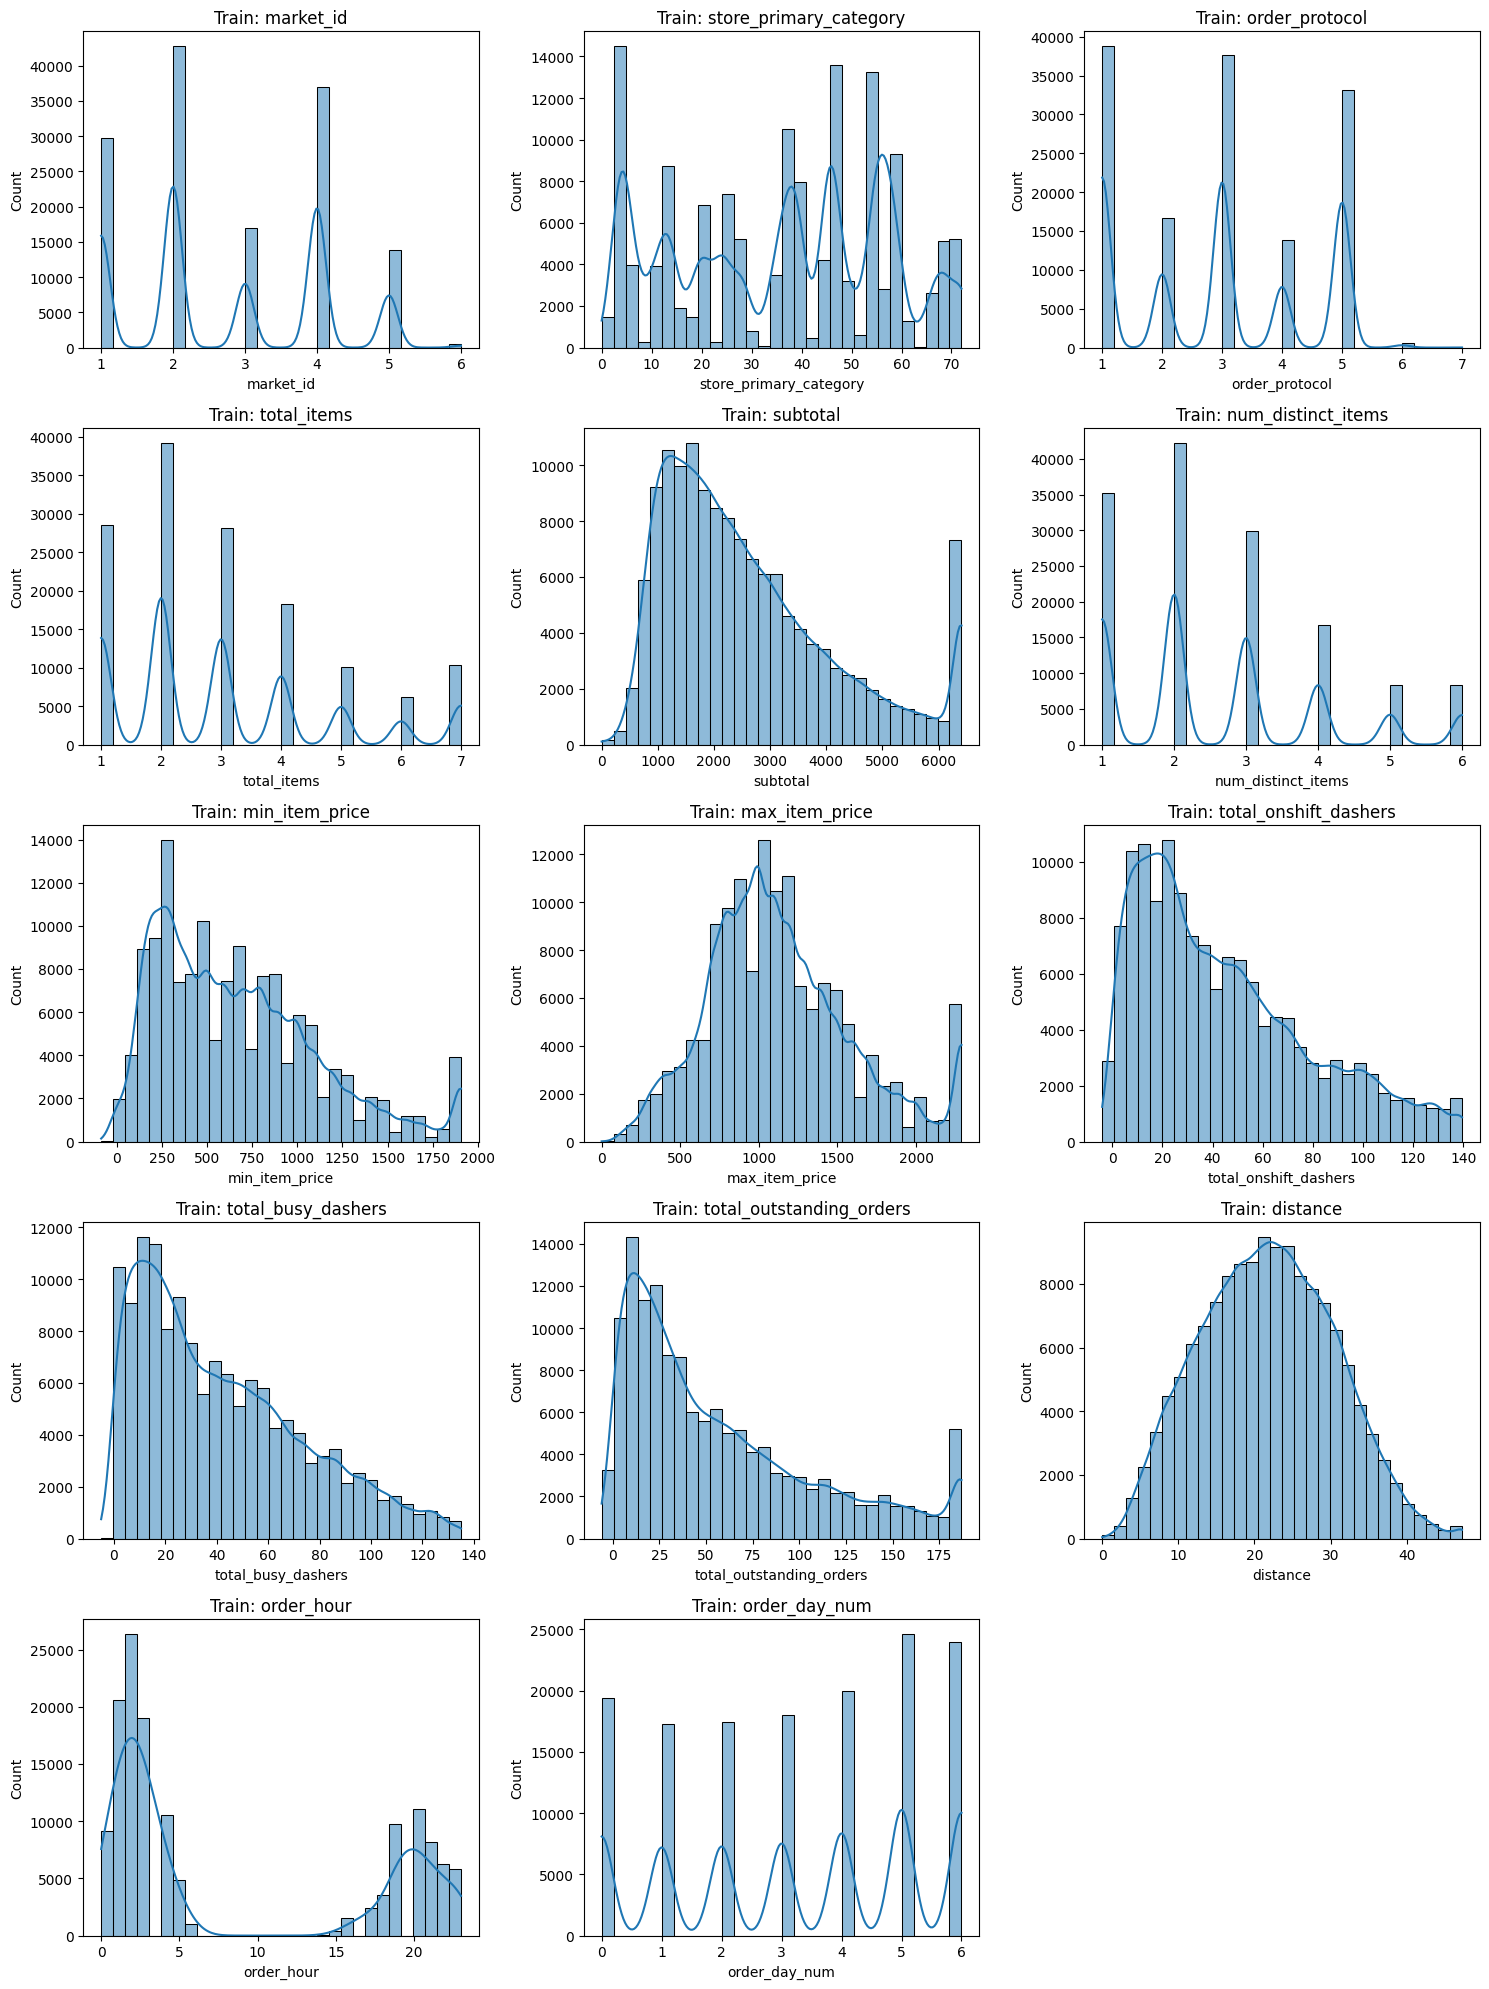

• Plotting countplot for categorical column: order_day


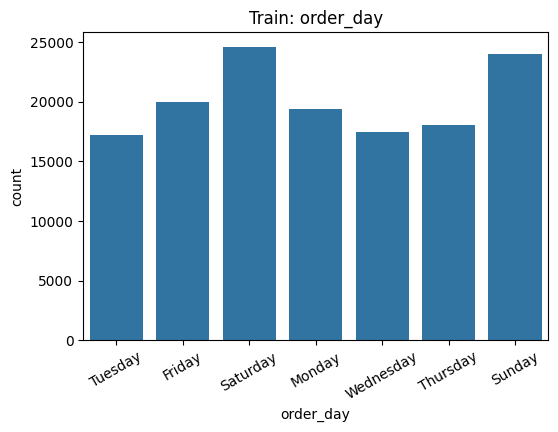

• Plotting countplot for categorical column: isWeekend


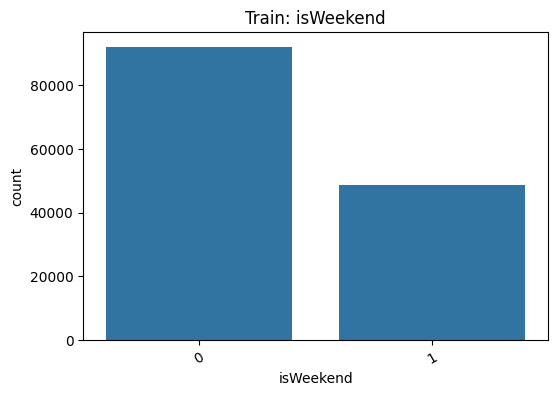

• Plotting target distribution (y_train)


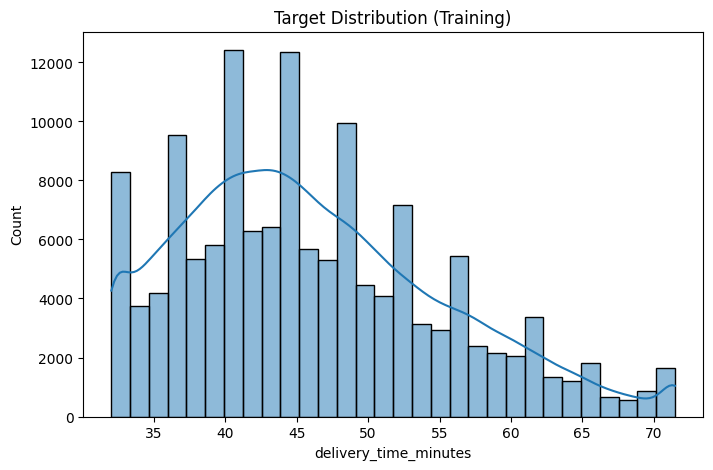

• Plotting target boxplot (y_train)


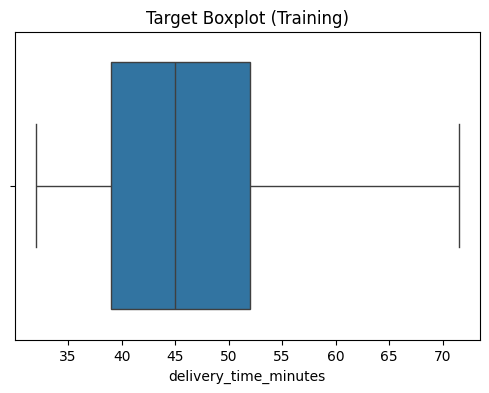


2) Correlation Heatmap (numeric features)


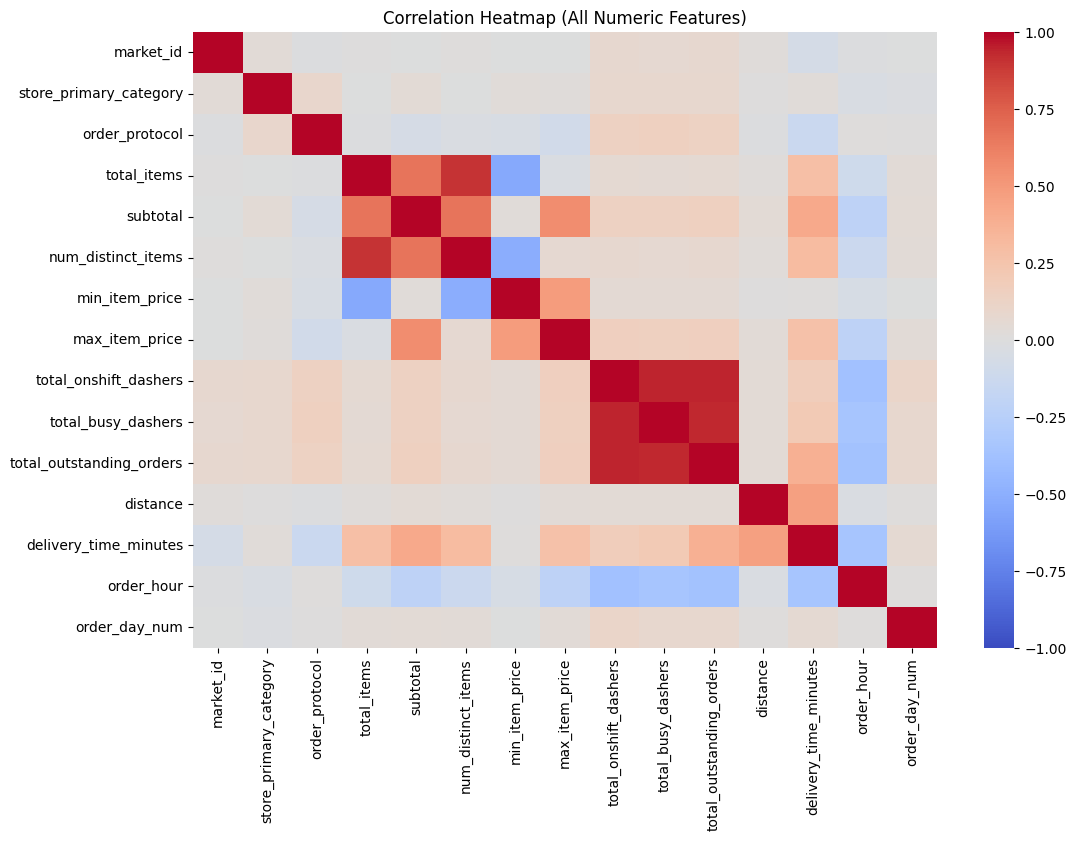


3) Outlier Visualisation – Boxplots


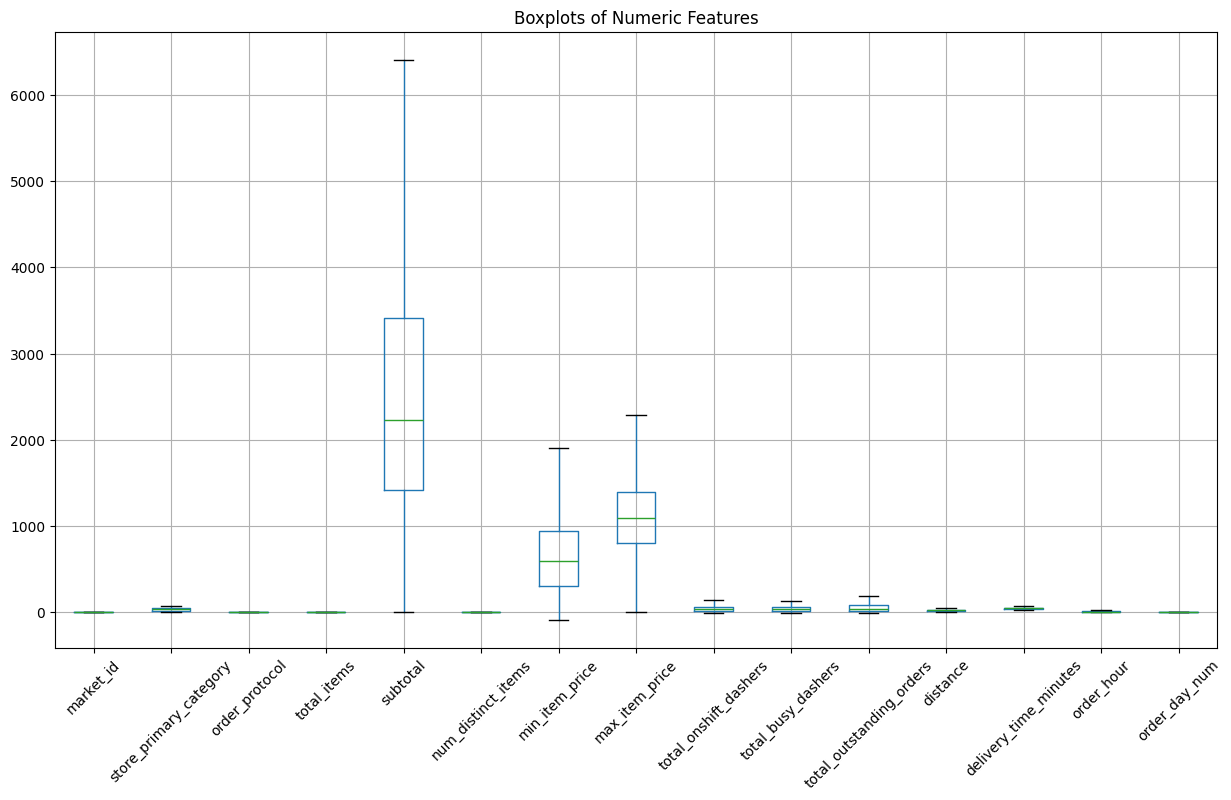


4) Feature Relationships with Target (Training)
• Scatter: delivery_time_minutes vs distance


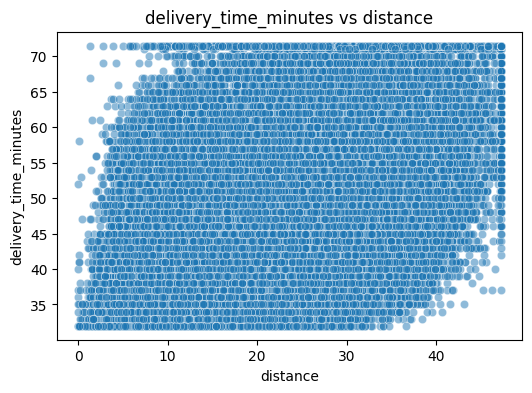

• Scatter: delivery_time_minutes vs subtotal


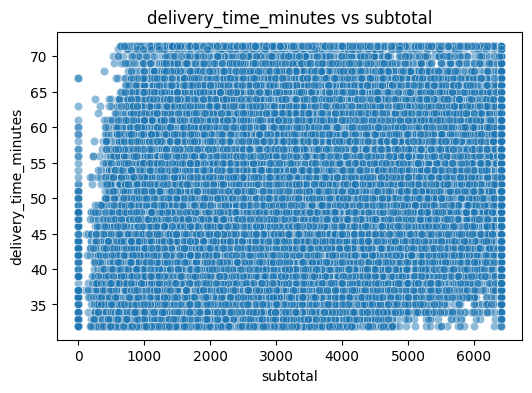

• Scatter: delivery_time_minutes vs total_items


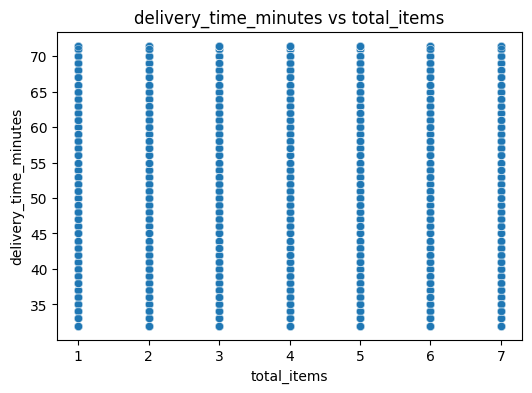

• Scatter: delivery_time_minutes vs order_hour


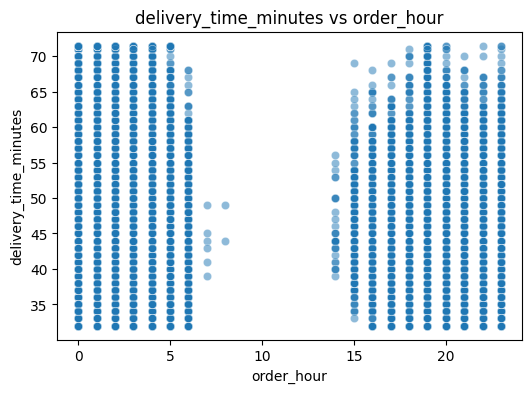

• Boxplot: isWeekend vs delivery_time_minutes


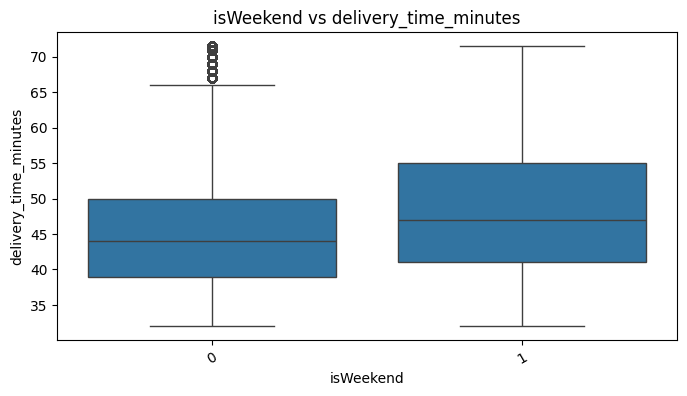

• Boxplot: order_day vs delivery_time_minutes


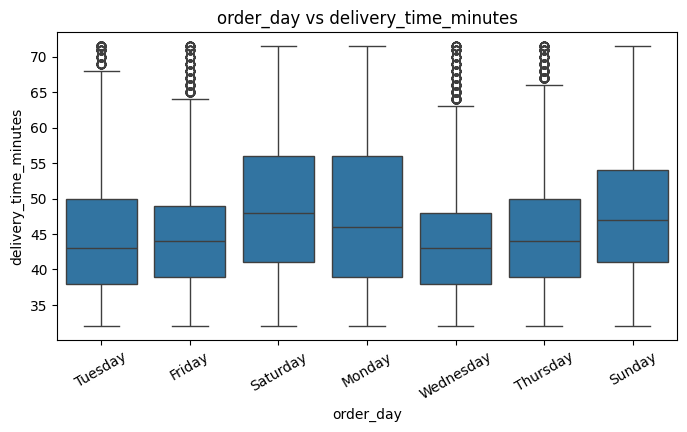

• Boxplot: store_primary_category vs delivery_time_minutes


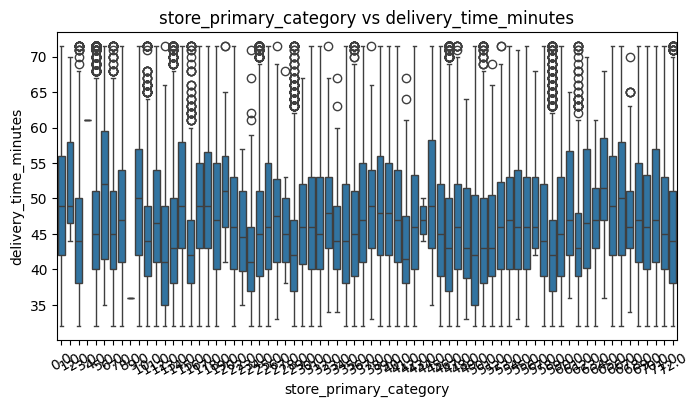


5) Validation Distributions (Optional)
• Plotting histograms for validation numerics: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_num']


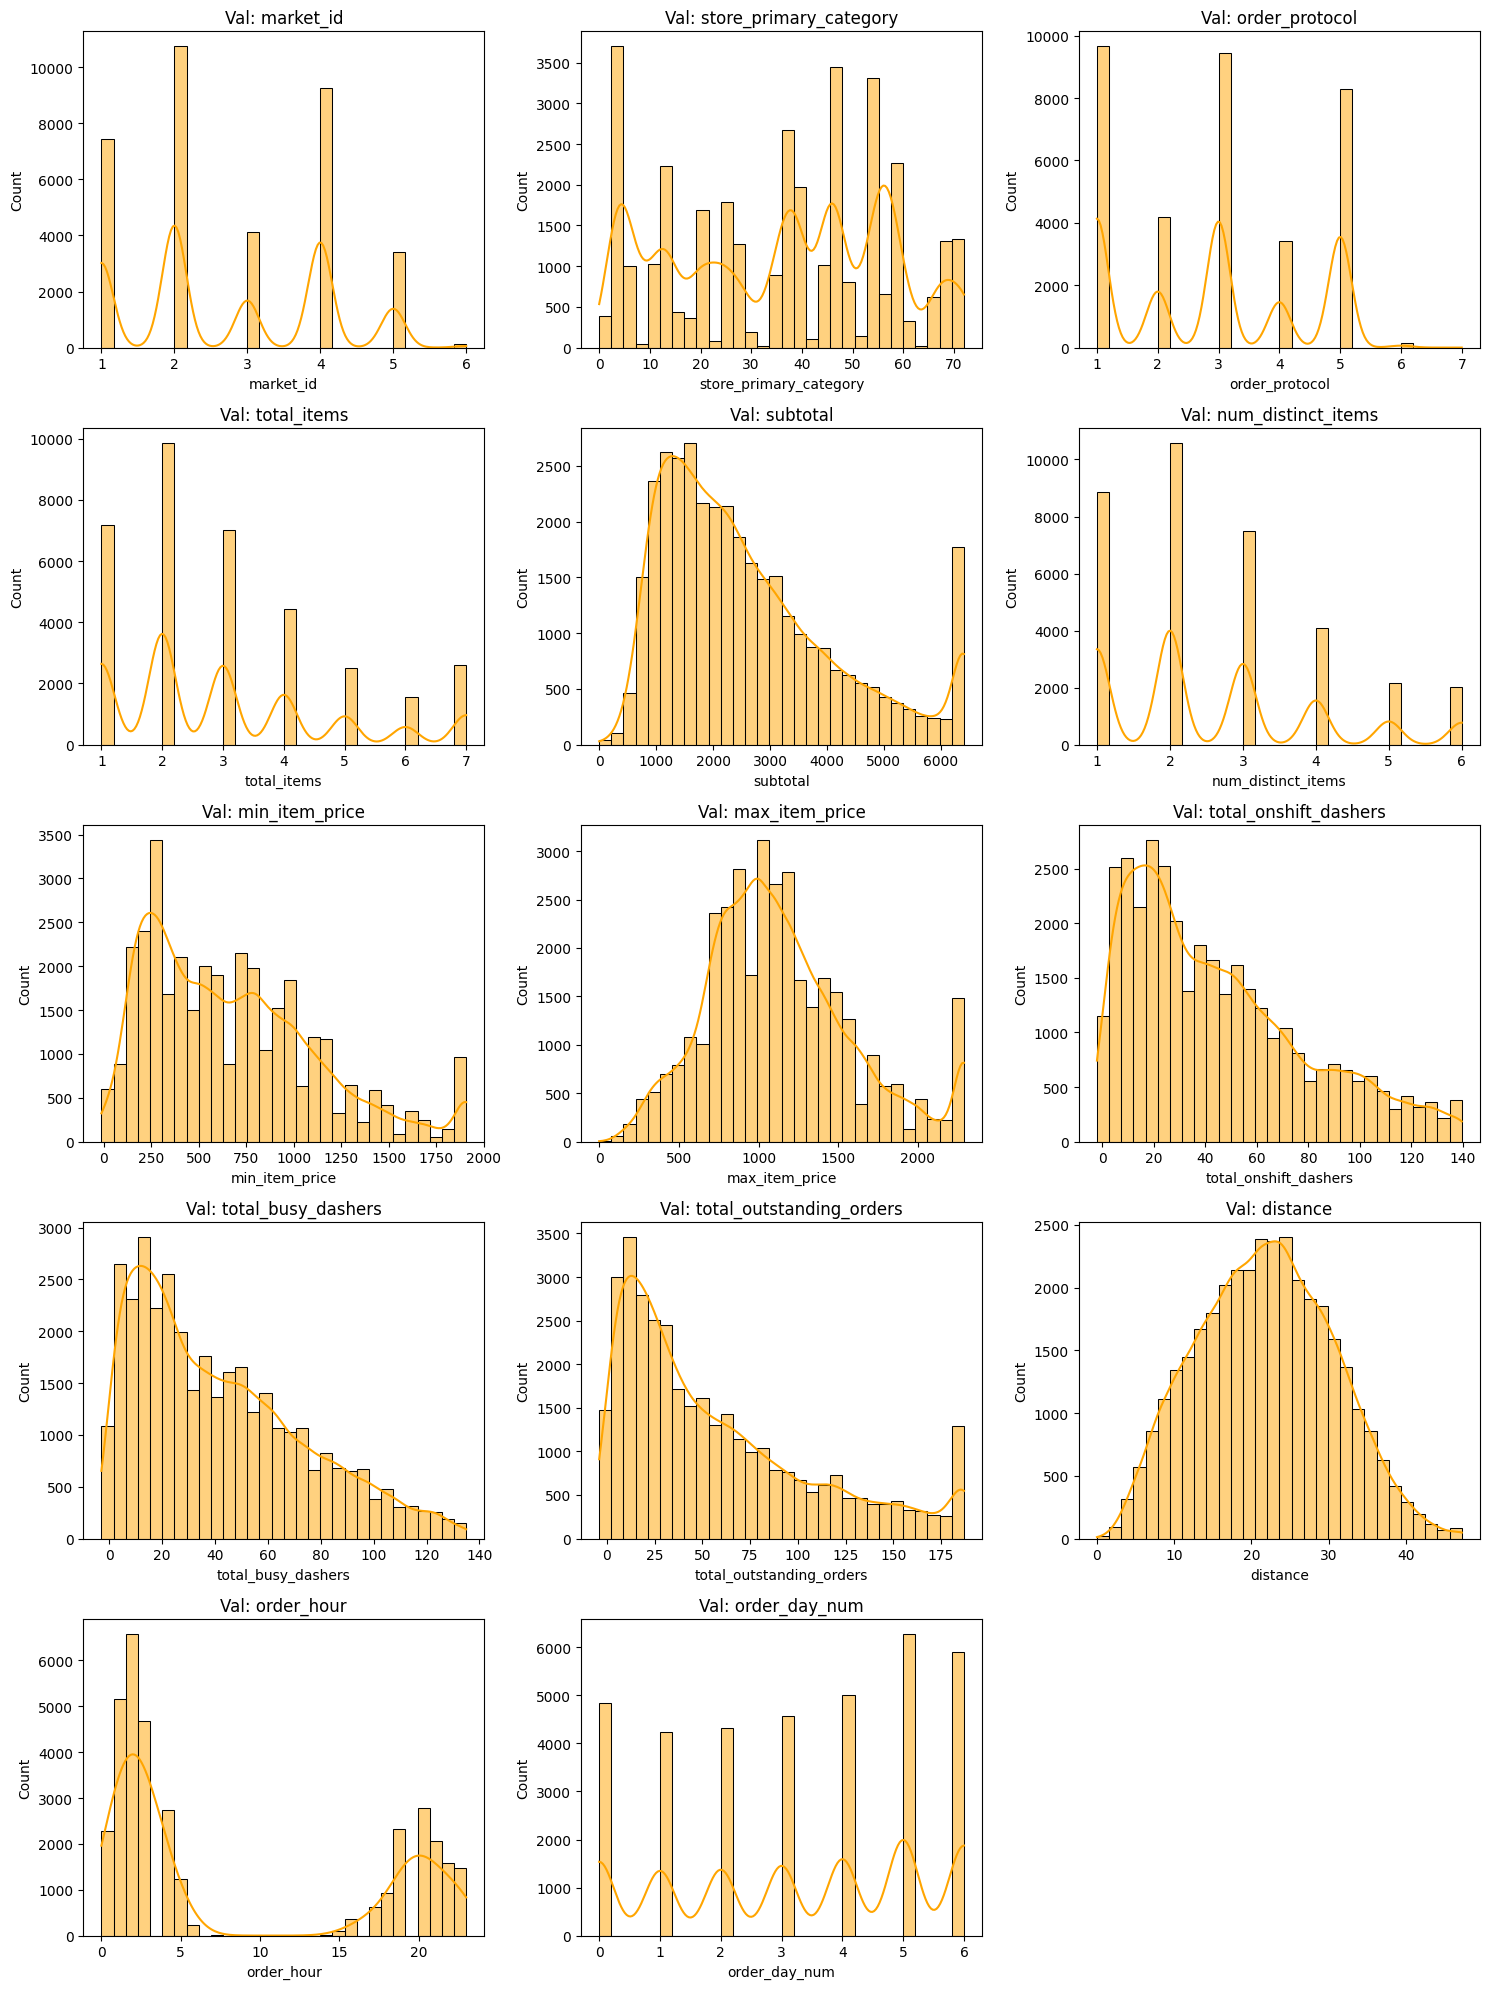

Plotting target distribution (y_val)


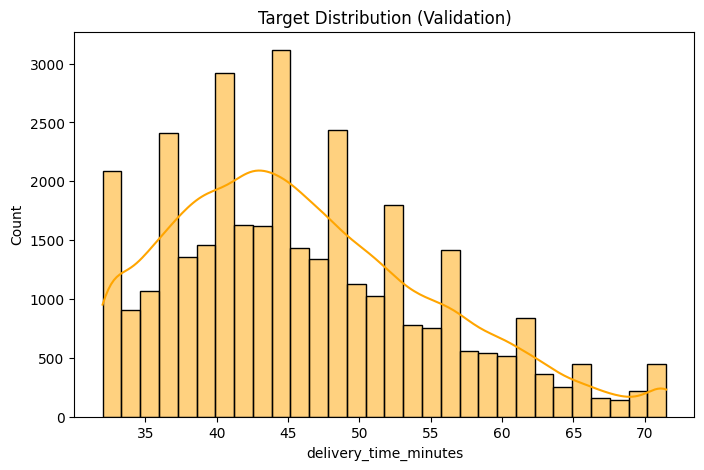


6) Residual Analysis (requires predictions)
Residuals vs Predicted


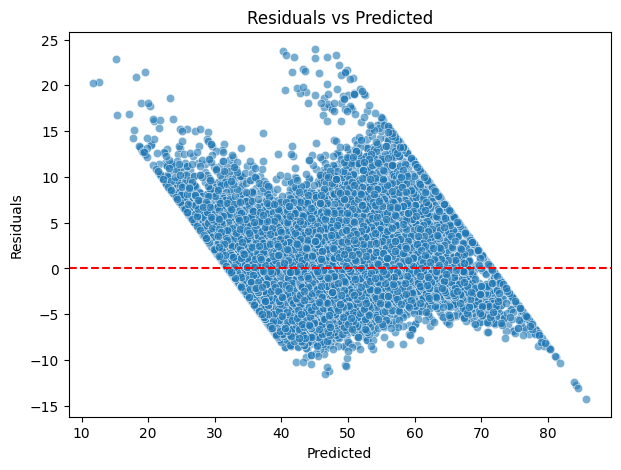

Residuals Histogram


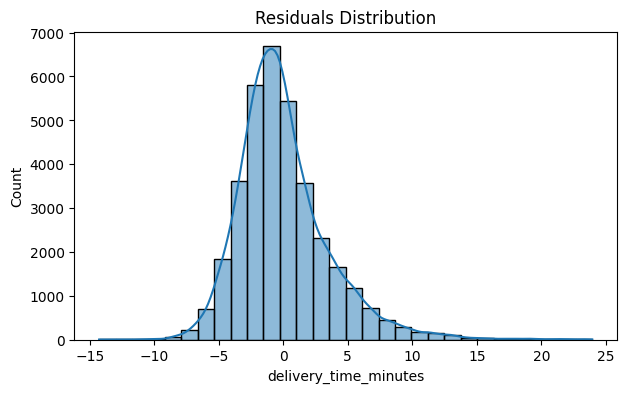

Q-Q Plot (Residuals)


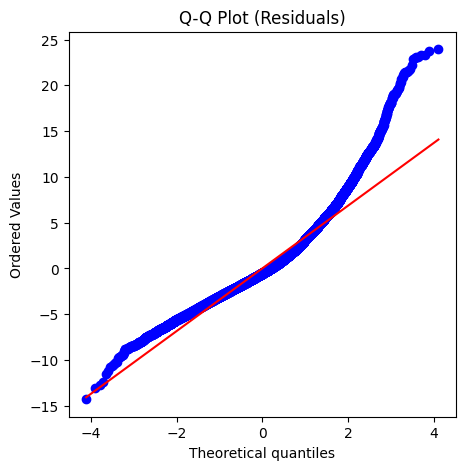

In [186]:
# ===============================================
# VISUALIZATION-ONLY CELL + PRINT STATEMENTS
# (Assumes df, X_train, y_train, X_val, y_val may exist)
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def _exists(name): return name in globals()
def _get(name, default=None): return globals().get(name, default)

df      = _get("df")
X_train = _get("X_train")
y_train = _get("y_train")
X_val   = _get("X_val")
y_val   = _get("y_val")

# 1) EDA – Distributions (Training)
print("▶ 1) EDA: Distributions on Training Data")

if X_train is not None:
    num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X_train.select_dtypes(include=["object","category","bool"]).columns.tolist()

    # Numerical distributions
    if num_cols:
        print(f"• Plotting histograms for numerical columns: {list(num_cols)}")
        rows = int(np.ceil(len(num_cols)/3))
        plt.figure(figsize=(15, 4*rows))
        for i, col in enumerate(num_cols, 1):
            plt.subplot(rows, 3, i)
            sns.histplot(X_train[col], bins=30, kde=True)
            plt.title(f"Train: {col}")
        plt.tight_layout()
        plt.show()
    else:
        print("• No numerical columns found in X_train.")

    # Categorical distributions
    for col in cat_cols:
        print(f"• Plotting countplot for categorical column: {col}")
        plt.figure(figsize=(6,4))
        sns.countplot(x=X_train[col])
        plt.title(f"Train: {col}")
        plt.xticks(rotation=30)
        plt.show()
else:
    print("X_train not found. Skipping EDA distributions.")

# Target distribution (Training)
if y_train is not None:
    print("• Plotting target distribution (y_train)")
    plt.figure(figsize=(8,5))
    sns.histplot(y_train, bins=30, kde=True)
    plt.title("Target Distribution (Training)")
    plt.xlabel("delivery_time_minutes")
    plt.show()

    print("• Plotting target boxplot (y_train)")
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y_train)
    plt.title("Target Boxplot (Training)")
    plt.xlabel("delivery_time_minutes")
    plt.show()
else:
    print("y_train not found. Skipping target plots.")

# 2) Correlation Heatmap (numeric-only, whole df)
print("\n2) Correlation Heatmap (numeric features)")
if df is not None:
    num_df = df.select_dtypes(include=[np.number])
    if not num_df.empty:
        plt.figure(figsize=(12,8))
        sns.heatmap(num_df.corr(), cmap="coolwarm", vmin=-1, vmax=1)
        plt.title("Correlation Heatmap (All Numeric Features)")
        plt.show()
    else:
        print("No numeric columns in df.")
else:
    print("df not found. Skipping heatmap.")

# 3) Outlier Visualization – Boxplots (All numeric in df)
print("\n3) Outlier Visualisation – Boxplots")
if df is not None:
    num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols_all:
        plt.figure(figsize=(15, 8))
        df[num_cols_all].boxplot(rot=45)
        plt.title("Boxplots of Numeric Features")
        plt.show()
    else:
        print("• No numeric columns in df.")
else:
    print("df not found. Skipping boxplots.")

# 4) Feature Relationships (Train)
print("\n4) Feature Relationships with Target (Training)")
if X_train is not None and y_train is not None:
    # Pick a few common important features if they exist
    candidate_num = [c for c in ["distance","subtotal","total_items","order_hour"] if c in X_train.columns]
    for col in candidate_num:
        print(f"• Scatter: delivery_time_minutes vs {col}")
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
        plt.title(f"delivery_time_minutes vs {col}")
        plt.xlabel(col); plt.ylabel("delivery_time_minutes")
        plt.show()

    # Categorical vs target (boxplots)
    candidate_cat = [c for c in ["isWeekend","order_day","store_primary_category"] if c in X_train.columns]
    for col in candidate_cat:
        print(f"• Boxplot: {col} vs delivery_time_minutes")
        plt.figure(figsize=(8,4))
        sns.boxplot(x=X_train[col], y=y_train)
        plt.title(f"{col} vs delivery_time_minutes")
        plt.xticks(rotation=30)
        plt.show()
else:
    print("X_train or y_train not found. Skipping relationship plots.")

# 5) Validation Set Distributions (Optional)
print("\n5) Validation Distributions (Optional)")
if X_val is not None:
    num_cols_val = X_val.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols_val:
        print(f"• Plotting histograms for validation numerics: {list(num_cols_val)}")
        rows = int(np.ceil(len(num_cols_val)/3))
        plt.figure(figsize=(15, 4*rows))
        for i, col in enumerate(num_cols_val, 1):
            plt.subplot(rows, 3, i)
            sns.histplot(X_val[col], bins=30, kde=True, color="orange")
            plt.title(f"Val: {col}")
        plt.tight_layout()
        plt.show()
    else:
        print("No numerical columns in X_val.")

    # If y_val exists, show its distribution too
    if y_val is not None:
        print("Plotting target distribution (y_val)")
        plt.figure(figsize=(8,5))
        sns.histplot(y_val, bins=30, kde=True, color="orange")
        plt.title("Target Distribution (Validation)")
        plt.xlabel("delivery_time_minutes")
        plt.show()
else:
    print("X_val not found. Skipping validation plots.")

# 6) Residual Analysis (if y_val_pred_final exists)
print("\n6) Residual Analysis (requires predictions)")
y_val_pred_final = _get("y_val_pred_final")
if (y_val is not None) and (y_val_pred_final is not None):
    residuals = y_val - y_val_pred_final

    print("Residuals vs Predicted")
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_val_pred_final, y=residuals, alpha=0.6)
    plt.axhline(0, color="red", ls="--")
    plt.title("Residuals vs Predicted")
    plt.xlabel("Predicted"); plt.ylabel("Residuals")
    plt.show()

    print("Residuals Histogram")
    plt.figure(figsize=(7,4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title("Residuals Distribution")
    plt.show()

    print("Q-Q Plot (Residuals)")
    import scipy.stats as stats
    plt.figure(figsize=(5,5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot (Residuals)")
    plt.show()
else:
    print("y_val or y_val_pred_final not found. Skipping residual plots.")


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the dataset will be allocated to the test set, and the remaining 80% will be used for the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the correlation heatmap and correlation matrix analysis, the feature with the highest correlation with the target variable delivery_time_minutes is: distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>### 🔍 Outlier Detection and Handling

#### **Outlier Detection Approach**
1. **Boxplots Visualization**  
   - Boxplots were plotted for the target variable (`delivery_time_minutes`) and other numerical features.  
   - These visualizations helped identify values lying far outside the interquartile range (IQR), which are potential outliers.  

2. **Statistical Rule (IQR Method)**  
   - We used the **Interquartile Range (IQR)** method:
     - \( Q1 = 25^{th} \) percentile  
     - \( Q3 = 75^{th} \) percentile  
     - \( IQR = Q3 - Q1 \)  
     - Outlier condition:  
       - Values < \( Q1 - 1.5 \times IQR \)  
       - Values > \( Q3 + 1.5 \times IQR \)  

---

#### **Handling the Outliers**
- Instead of removing rows (which could reduce useful data), we applied **capping/clipping**:  
  - Extreme values below the lower bound were capped at \( Q1 - 1.5 \times IQR \).  
  - Extreme values above the upper bound were capped at \( Q3 + 1.5 \times IQR \).  

- This ensured that the distribution remained consistent while reducing the influence of extreme points.

---

#### **Outcome**
- The distribution of numerical features became **smoother**.  
- Reduced the effect of extreme outliers on the **linear regression model coefficients**.  
- Improved **model stability** by preventing outliers (like unusually high delivery times) from skewing the results.  

---

**In summary:**  
We used **boxplots + IQR rule** to detect outliers and then **capped extreme values** to maintain dataset integrity while reducing skewness in the target and predictor variables.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final linear regression model and feature selection process, the top 3 features significantly affecting delivery time are:
Distance –The strongest positive influence on delivery time. As distance increases, delivery time also increases proportionally. This makes intuitive sense since longer travel directly translates into higher delivery duration.
Subtotal (order value) –Larger order values are often associated with bigger or more complex orders, which require longer preparation time, leading to longer delivery times.
Total Busy Dashers –A higher number of busy dashers indicates higher demand and lower availability of delivery partners, which increases delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>## Understanding Linear Regression

Linear Regression is one of the simplest and most widely used supervised machine learning algorithms.  
It is used when we want to **predict a continuous target variable** (dependent variable) based on one or more input features (independent variables).

The main idea is to find a **best-fitting straight line (or hyperplane in higher dimensions)** that describes the relationship between the features and the target variable.

### **Mathematical Representation**

For a model with `n` features:

\[
y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n
\]

Where:  
- \( y \) = predicted value of the dependent variable  
- \( b_0 \) = intercept (value of \( y \) when all \( x_i = 0 \))  
- \( b_1, b_2, \dots, b_n \) = coefficients showing how much each feature changes \( y \) when it increases by one unit  
- \( x_1, x_2, \dots, x_n \) = independent variables (features)

### **How It Works**
1. **Assume a Linear Relationship**: We start by assuming the relationship between \( X \) and \( y \) is linear.
2. **Estimate Coefficients**: The algorithm finds \( b_0, b_1, \dots, b_n \) by minimizing the **sum of squared residuals** (difference between predicted and actual values).  
   This is called the **Ordinary Least Squares (OLS)** method.
3. **Make Predictions**: Once coefficients are learned, we can plug in new \( X \) values to predict \( y \).

### **Error Term**
The actual equation includes an error term \( \varepsilon \):

\[
y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n + \varepsilon
\]

This accounts for the variation in \( y \) that cannot be explained by the model.

### **Key Assumptions**
- **Linearity**: Relationship between independent and dependent variables is linear.  
- **Independence**: Observations are independent of each other.  
- **Homoscedasticity**: Constant variance of residuals across all levels of \( X \).  
- **Normality**: Residuals are normally distributed.

### **Advantages**
- Simple to understand and implement.  
- Coefficients are easy to interpret.  

### **Limitations**
- Works poorly if the relationship is not linear.  
- Sensitive to outliers.  
- Assumes all key assumptions are met.

### **Practical Understanding**
When I practiced Linear Regression:
- I learned that **coefficients** tell me the direction and strength of influence of each feature.
- **Positive coefficient**: As the feature increases, \( y \) increases.
- **Negative coefficient**: As the feature increases, \( y \) decreases.
- Scaling features and handling outliers often improves the model’s performance.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>## Difference Between Simple Linear Regression and Multiple Linear Regression

### **1. Simple Linear Regression**
- **Definition**: Uses **only one independent variable** (feature) to predict the dependent variable (target).
- **Equation**:
\[
y = b_0 + b_1x_1 + \varepsilon
\]
- **Example**: Predicting a student’s exam score based only on the number of study hours.

---

### **2. Multiple Linear Regression**
- **Definition**: Uses **two or more independent variables** to predict the dependent variable.
- **Equation**:
\[
y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n + \varepsilon
\]
- **Example**: Predicting a student’s exam score based on number of study hours, hours of sleep, and number of practice tests taken.

---

### **Key Differences Table**

| Aspect                     | Simple Linear Regression                  | Multiple Linear Regression                     |
|----------------------------|--------------------------------------------|------------------------------------------------|
| **Number of Features**     | 1                                          | 2 or more                                      |
| **Equation**               | \(y = b_0 + b_1x_1\)                       | \(y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n\)   |
| **Use Case**               | One factor affecting target                | Multiple factors affecting target              |
| **Complexity**             | Easy to visualize and interpret            | Harder to visualize (needs higher-dimensional plots) |
| **Risk of Overfitting**    | Lower                                       | Higher (needs careful feature selection)       |

---

**In short**:
- Simple Linear Regression: One feature → one straight line.
- Multiple Linear Regression: Many features → a hyperplane in higher dimensions.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how far the model’s predictions are from the actual values. The most common cost function is Mean Squared Error (MSE), which calculates the average of the squared differences between predicted and actual values.

Its role is to act as a guide for the learning process — the goal is to find the set of coefficients that minimizes this error, leading to the best-fitting line or plane.

Minimization is usually done through Gradient Descent, where the algorithm iteratively adjusts the coefficients in the direction that reduces the cost, or by solving the Normal Equation, which directly computes the optimal coefficients mathematically.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model learns the training data too well, capturing not only the underlying patterns but also the noise. As a result, it performs very well on the training set but poorly on unseen data because it fails to generalize.

Underfitting happens when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training set and test set because it fails to learn enough from the data.

In short:

Overfitting = Too complex → memorizes training data → poor generalization.

Underfitting = Too simple → misses important patterns → poor accuracy everywhere.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose whether a linear regression model meets its key assumptions. They show the residuals (errors) plotted against predicted values or an independent variable.
If the residuals are randomly scattered around zero with no clear pattern, it suggests the model fits well and assumptions like linearity and constant variance (homoscedasticity) are met.

Patterns in the residual plot can reveal problems:
Curved patterns → the relationship is not purely linear.
Funnel-shaped spread → heteroscedasticity (variance changes across predictions).
Clusters or trends → possible missing variables or autocorrelation.
Extreme points → potential outliers influencing the model.